<a href="https://colab.research.google.com/github/amirdora/Yolo11CustomObjectDetection/blob/main/YOLO11CustomFaceFeatureDetectionCompleteFile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**How to Train YOLO11 Object Detection Model on a Custom Dataset**

In [ ]:
!nvidia-smi

Fri Feb  7 15:07:13 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.2/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="____________________")
project = rf.workspace("test-tnuvx").project("extracting-facial-features-ykifq-bjqdx")
version = project.version(3)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Extracting-Facial-Features-3 in yolov11:: 100%|██████████| 1592/1592 [00:00<00:00, 6030.97it/s]


In [ ]:
dataset.location

'/content/Extracting-Facial-Features-3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=40 imgsz=640

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/Extracting-Facial-Features-3/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

**Step # 05 Examine Training Results**

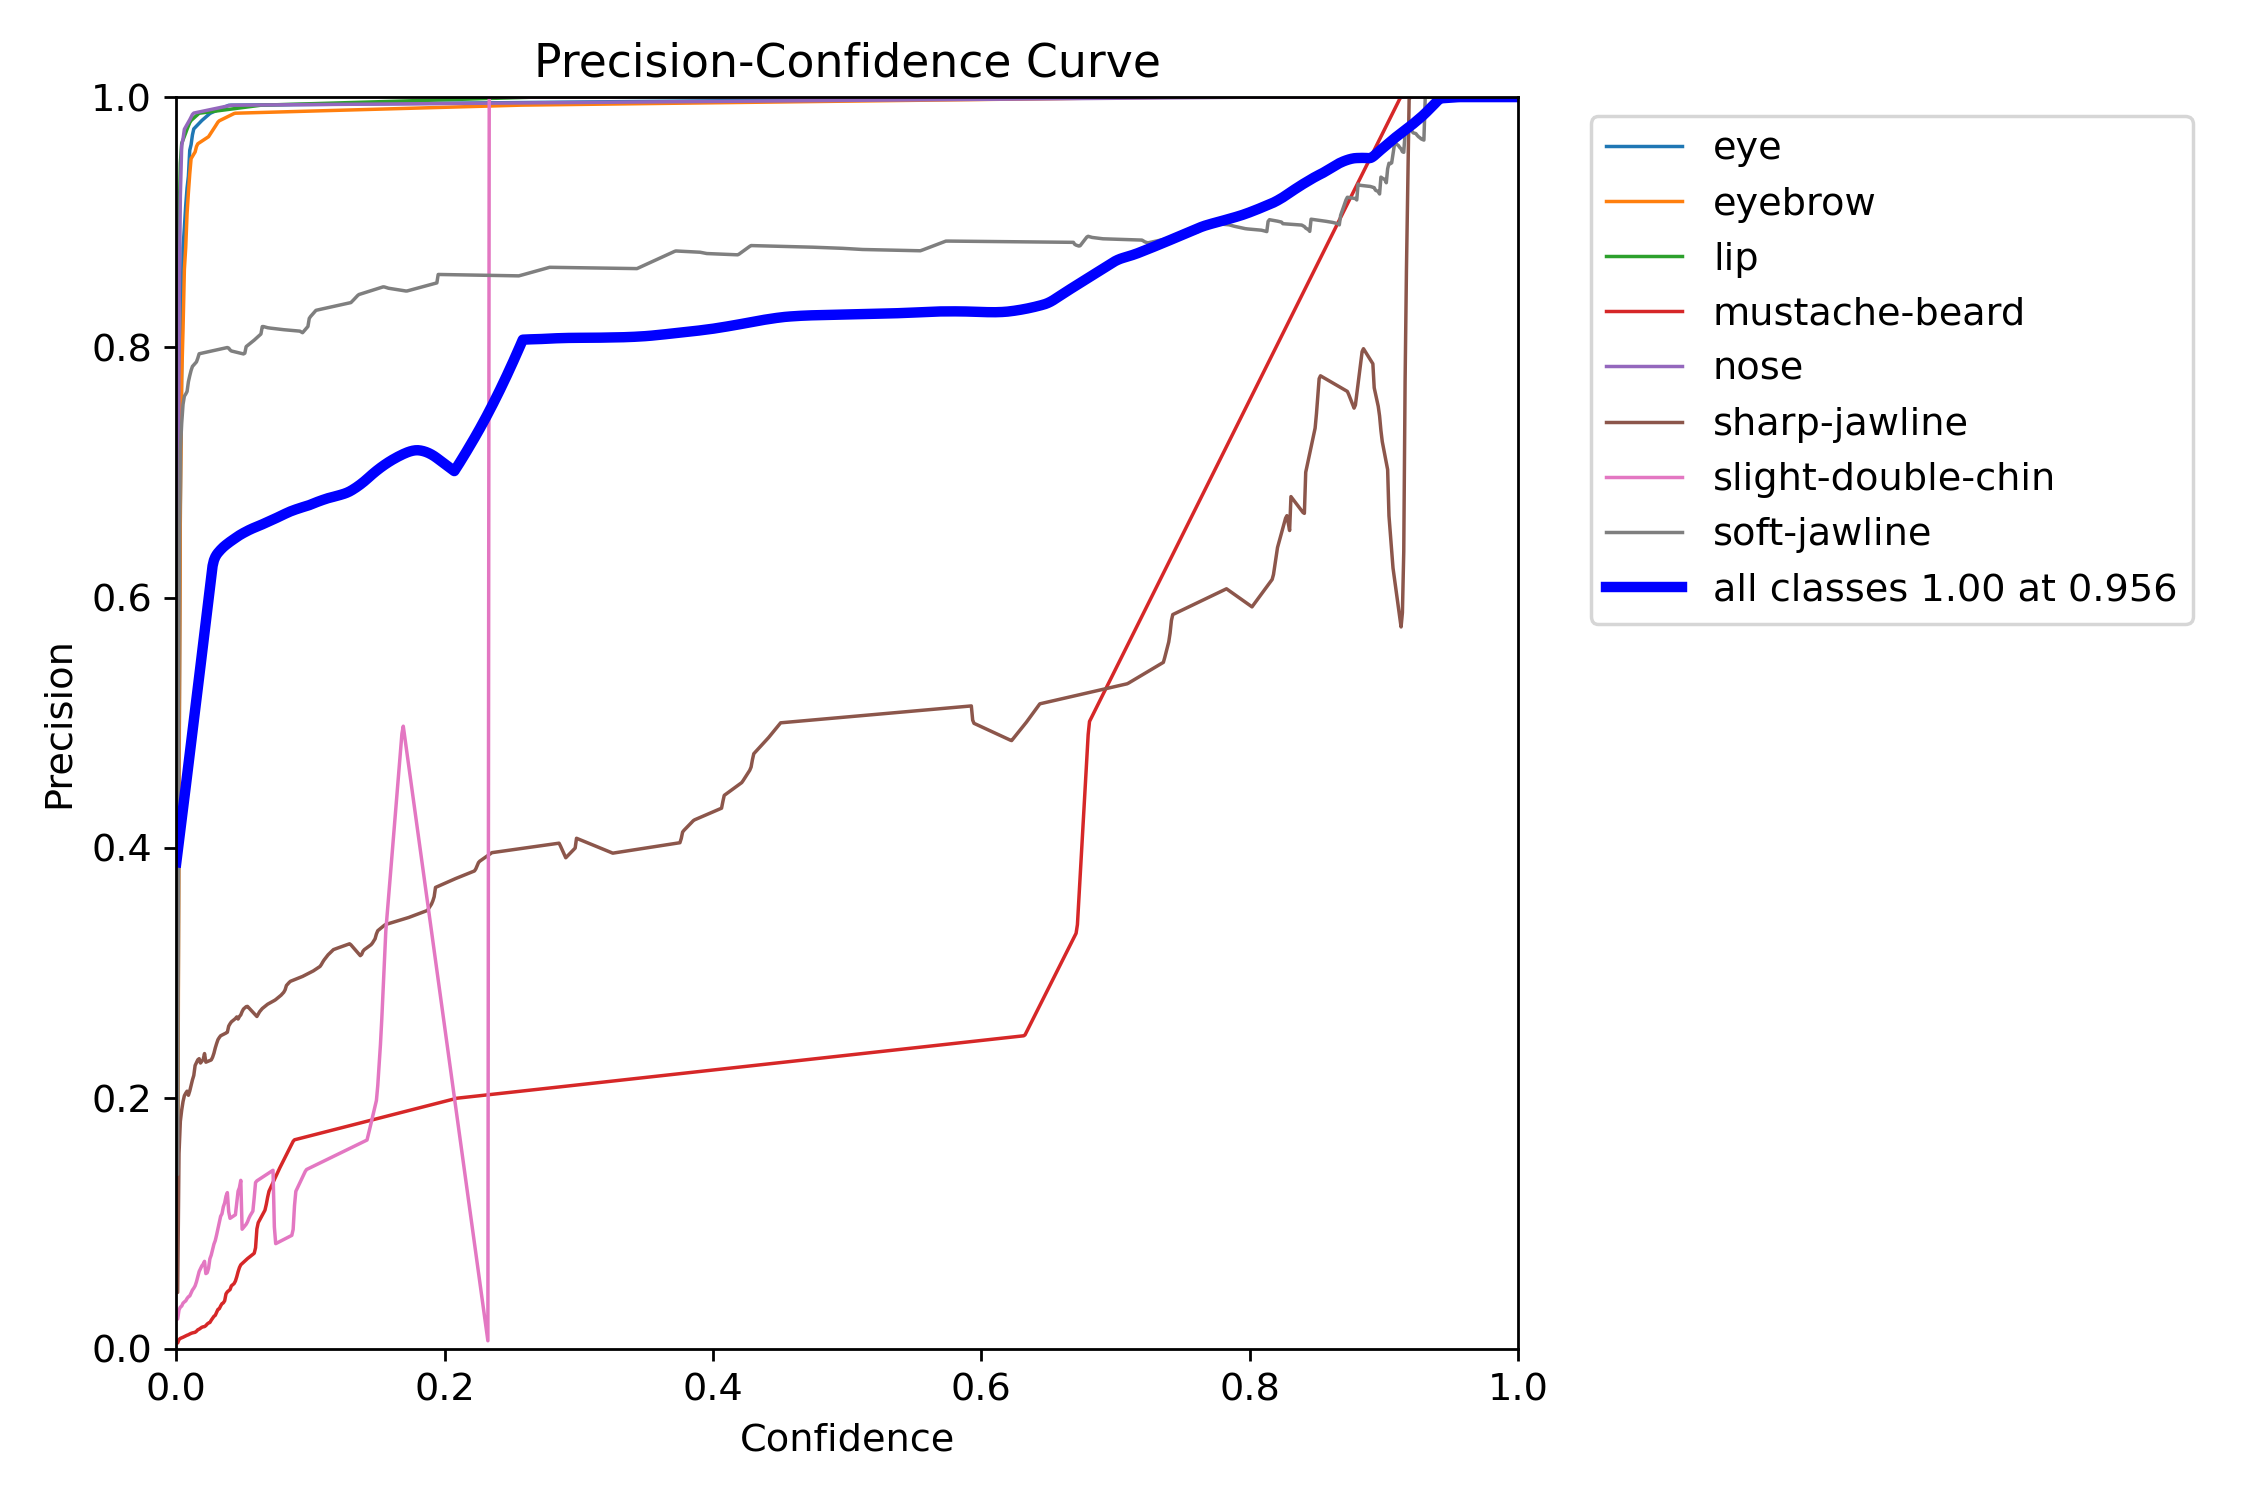

In [ ]:
Image("/content/runs/detect/train4/P_curve.png", width=600)

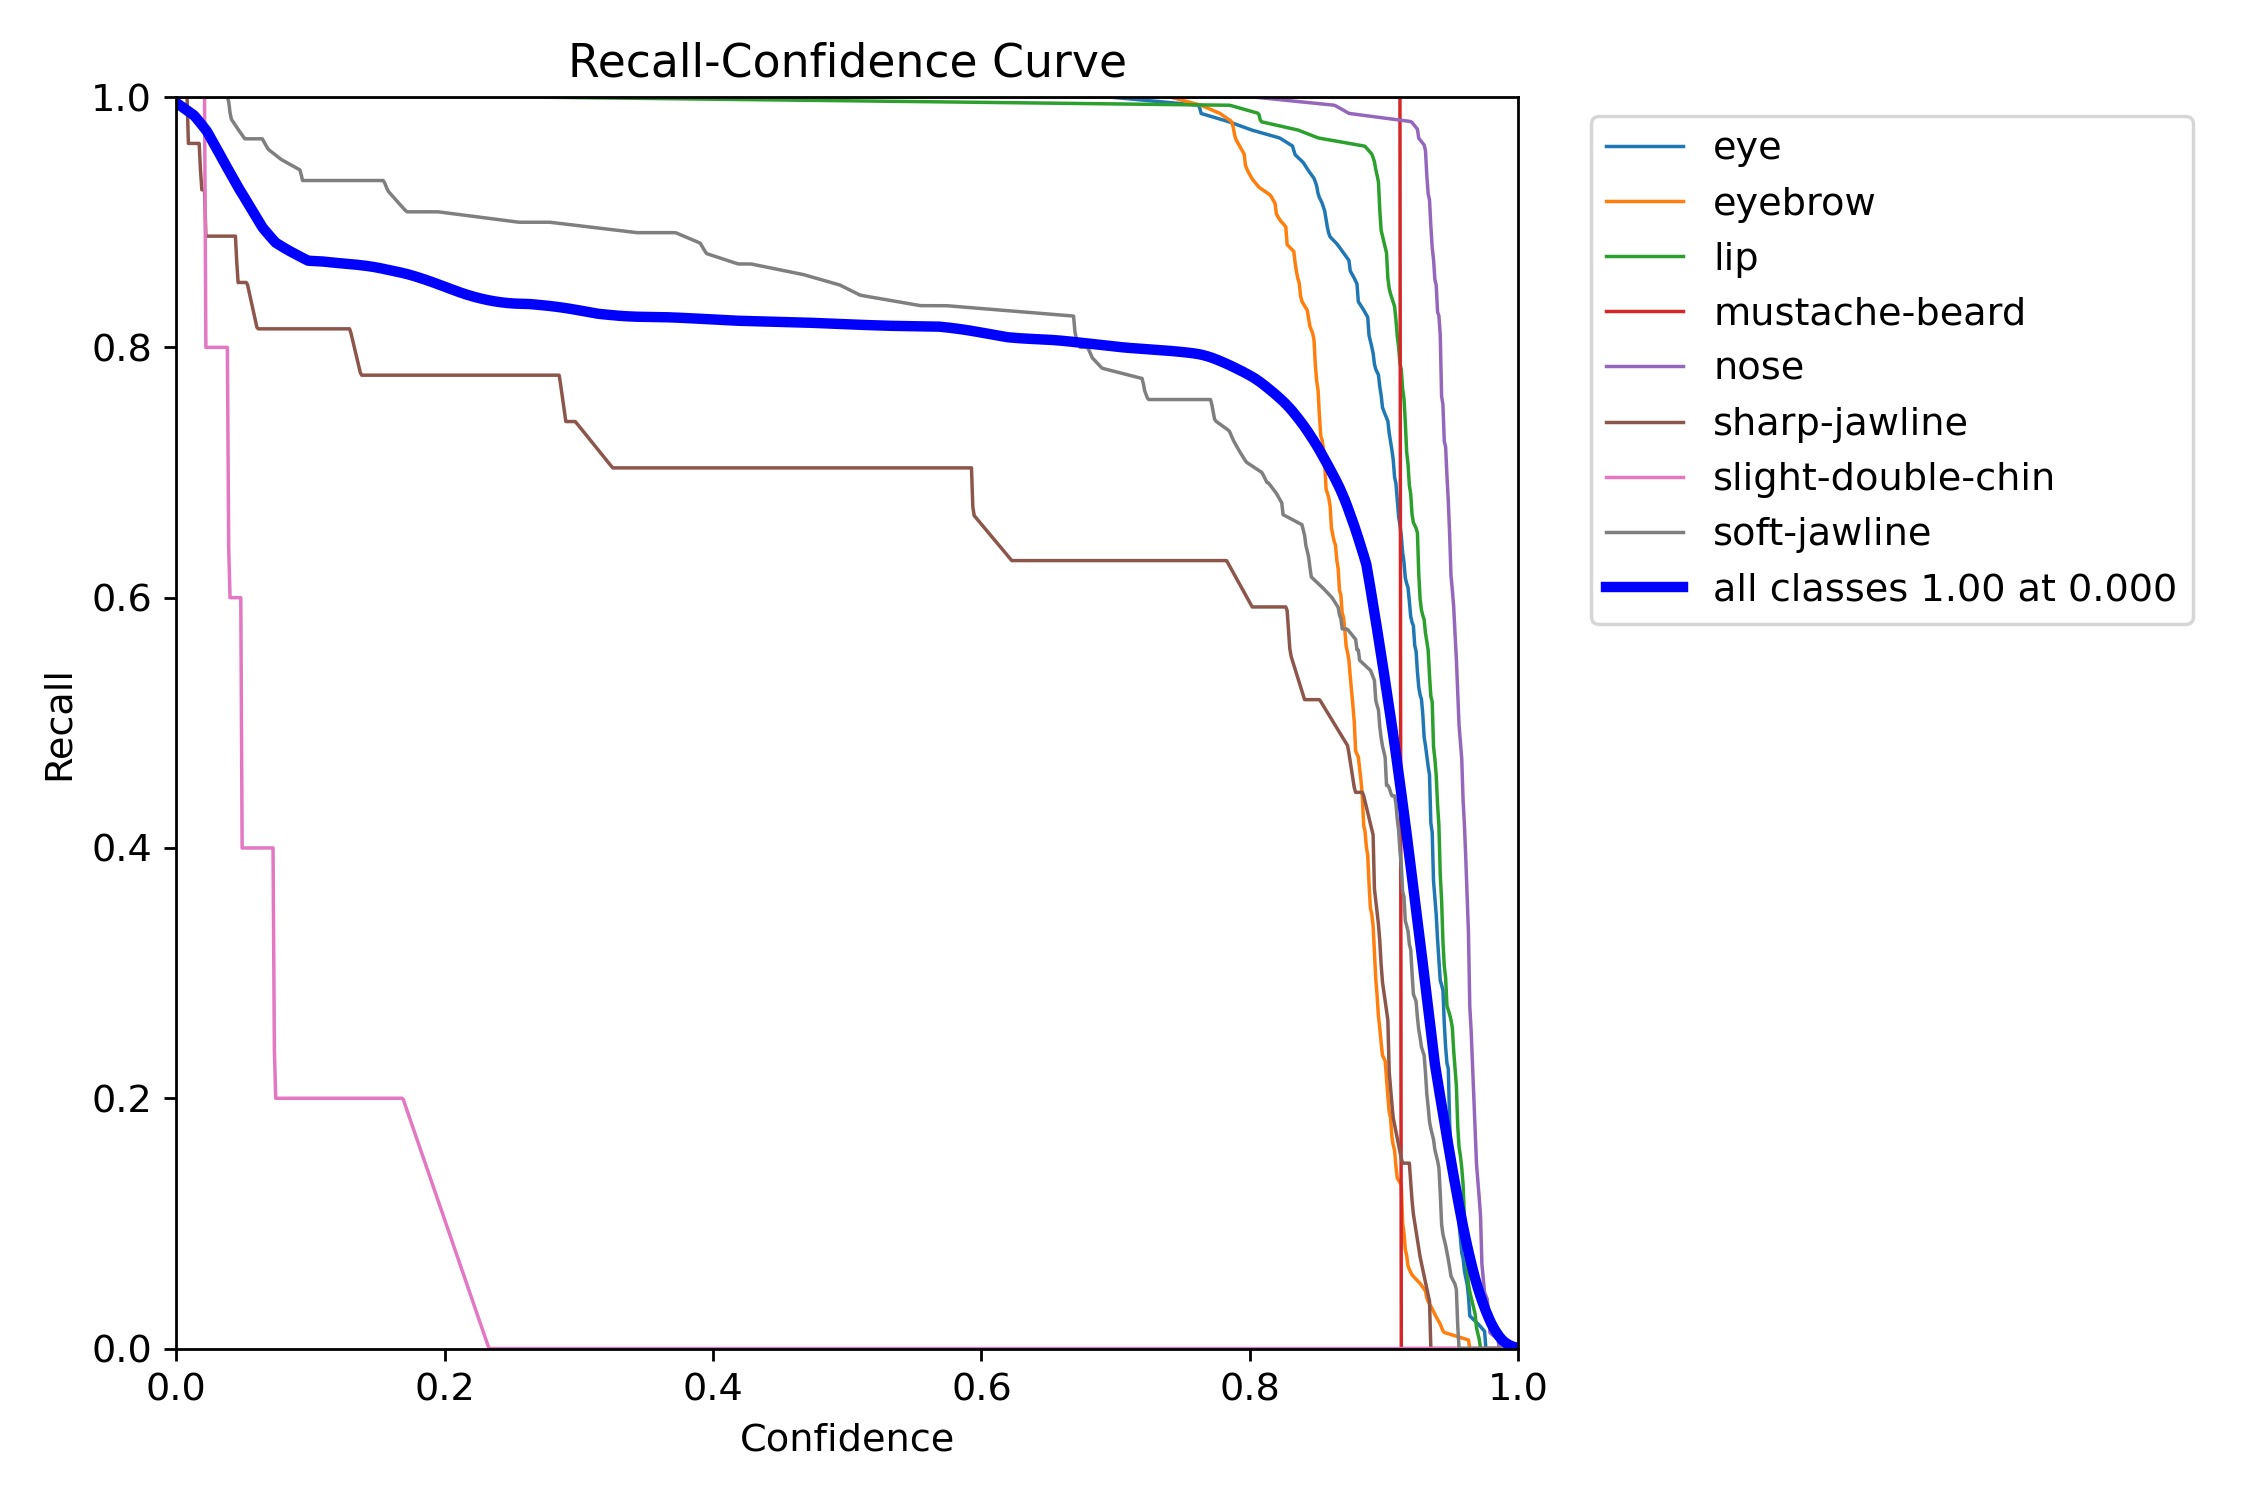

In [ ]:
Image("/content/runs/detect/train4/R_curve.png", width=600)

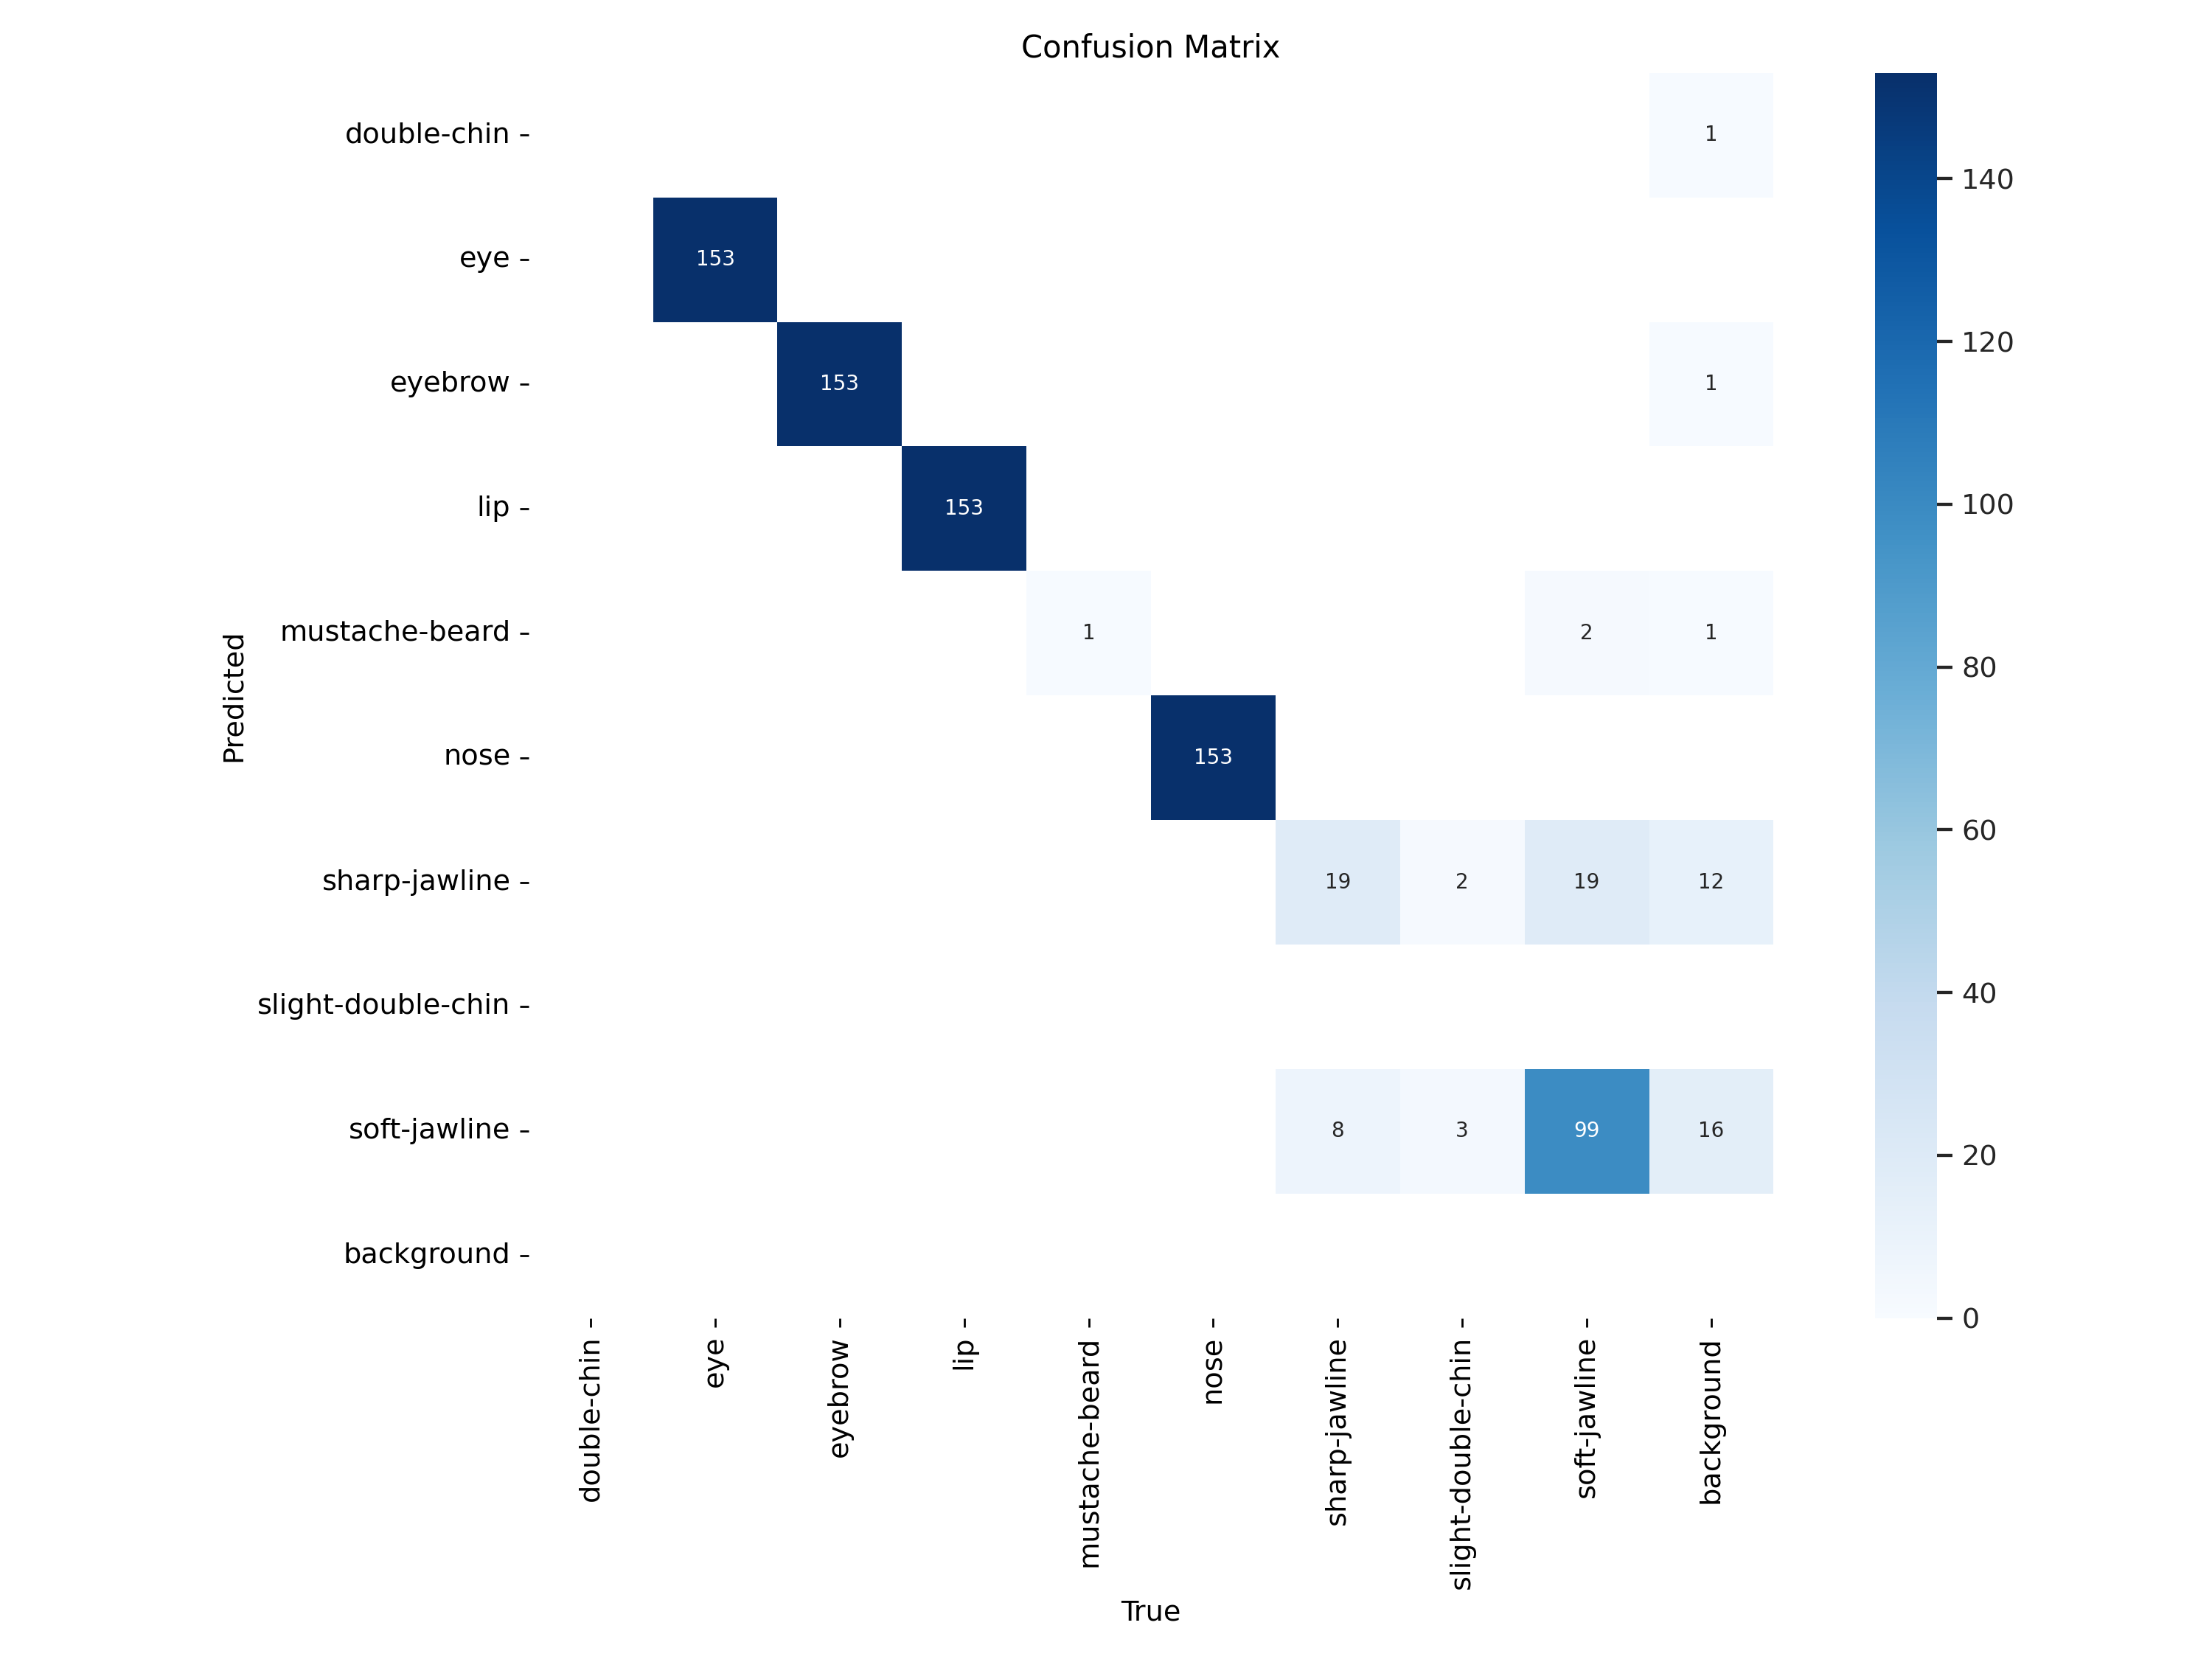

In [ ]:
Image("/content/runs/detect/train4/confusion_matrix.png", width=600)

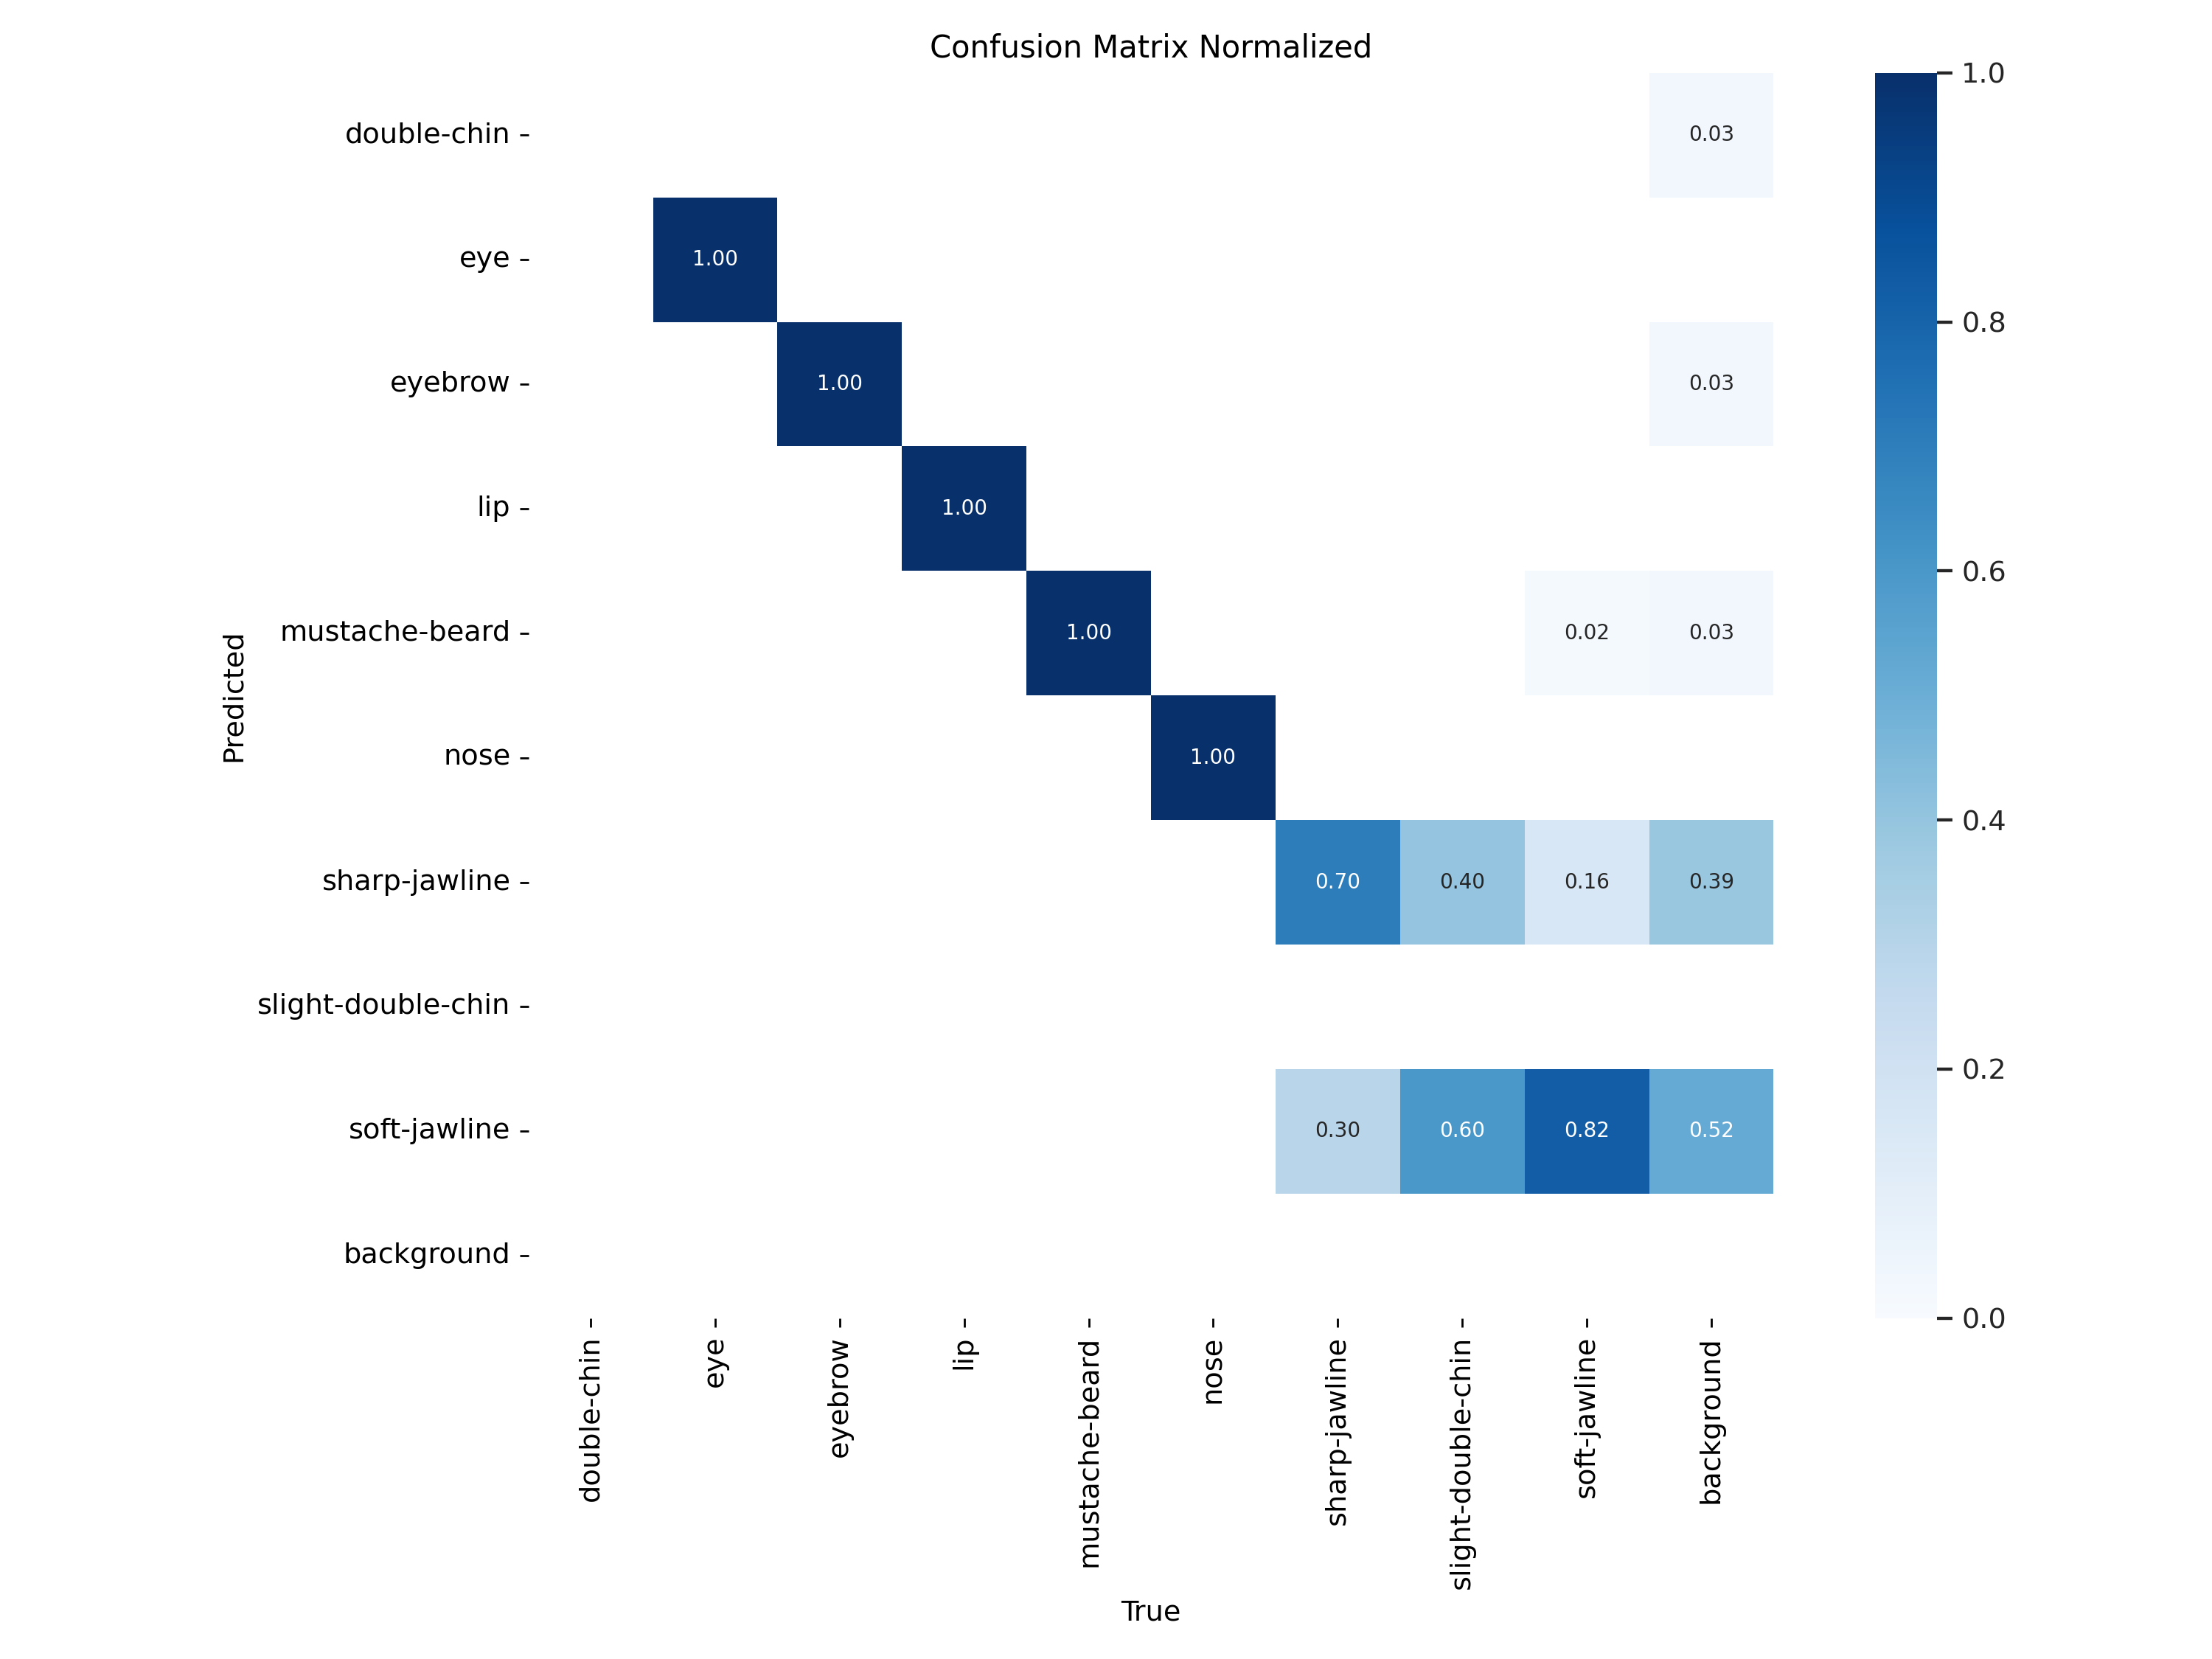

In [ ]:
Image("/content/runs/detect/train4/confusion_matrix_normalized.png", width=600)

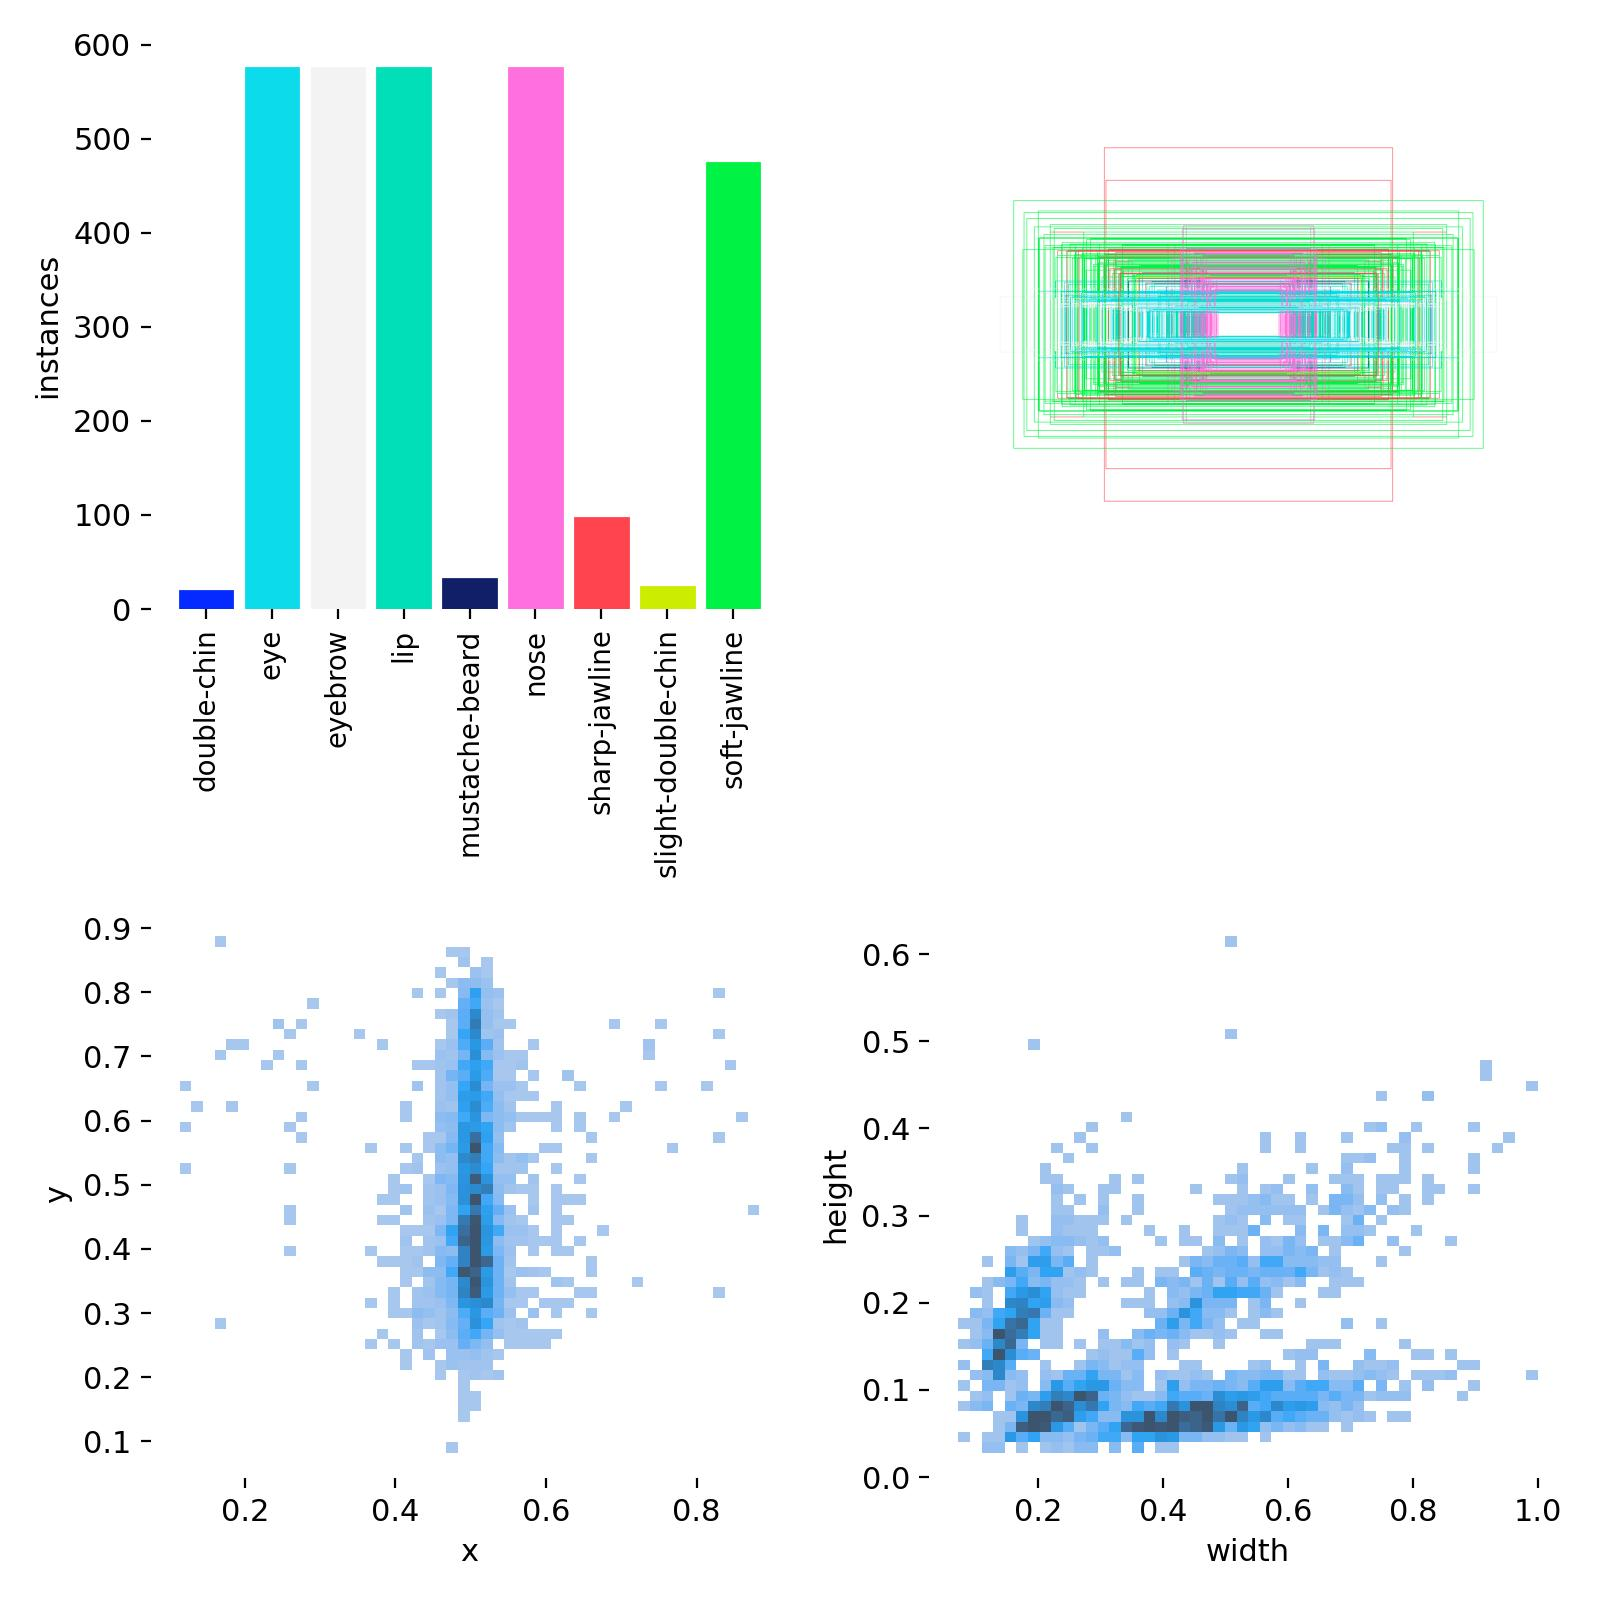

In [ ]:
Image("/content/runs/detect/train4/labels.jpg", width=600)

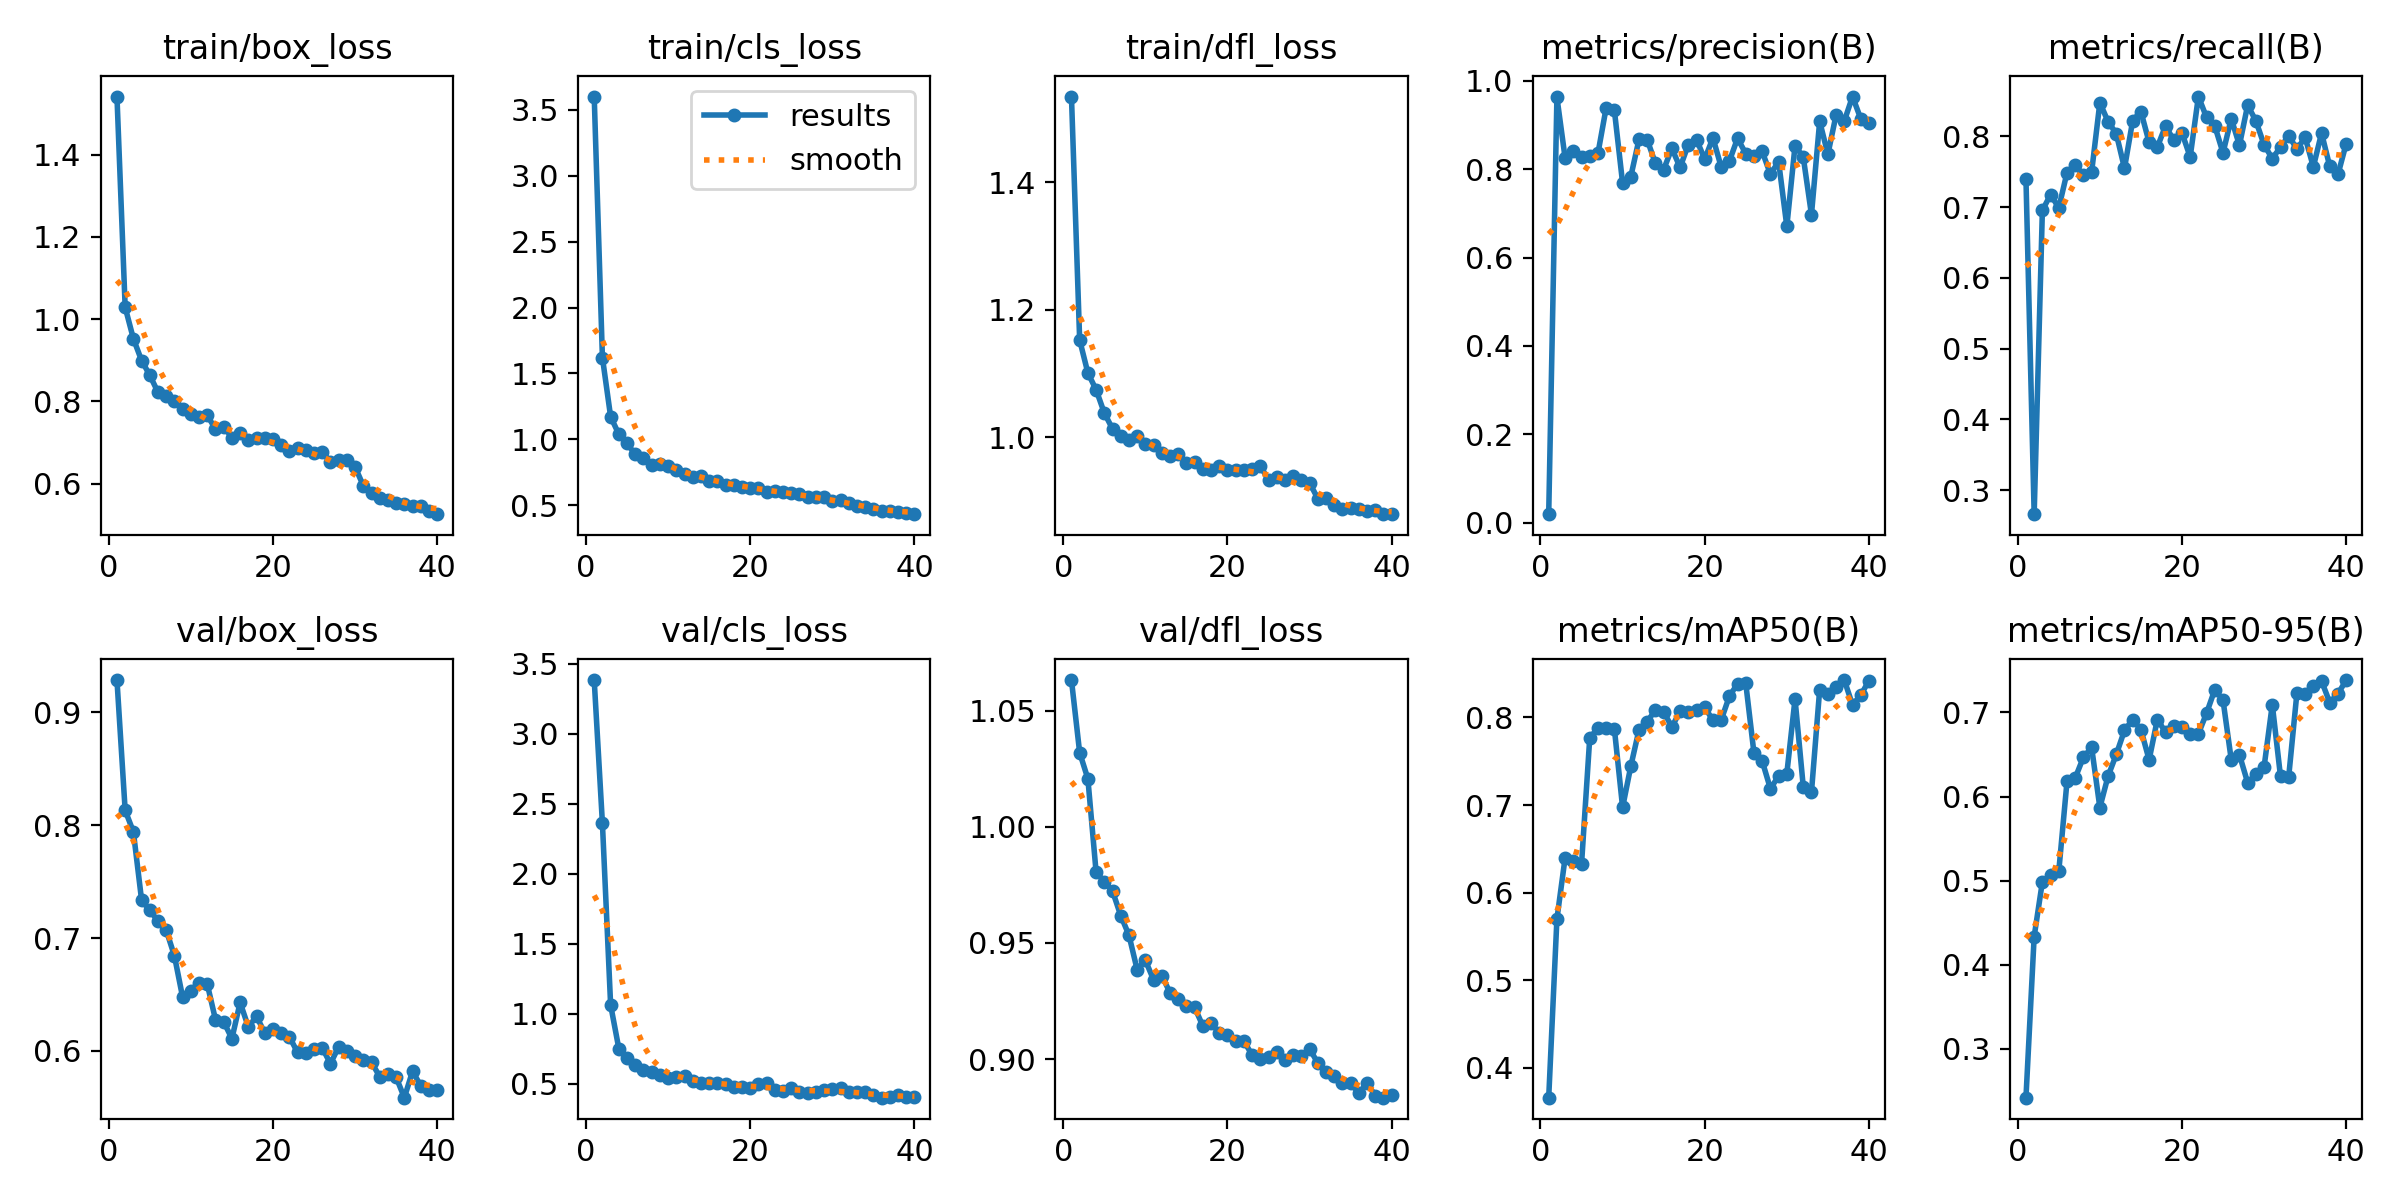

In [ ]:
Image("/content/runs/detect/train4/results.png", width=600)

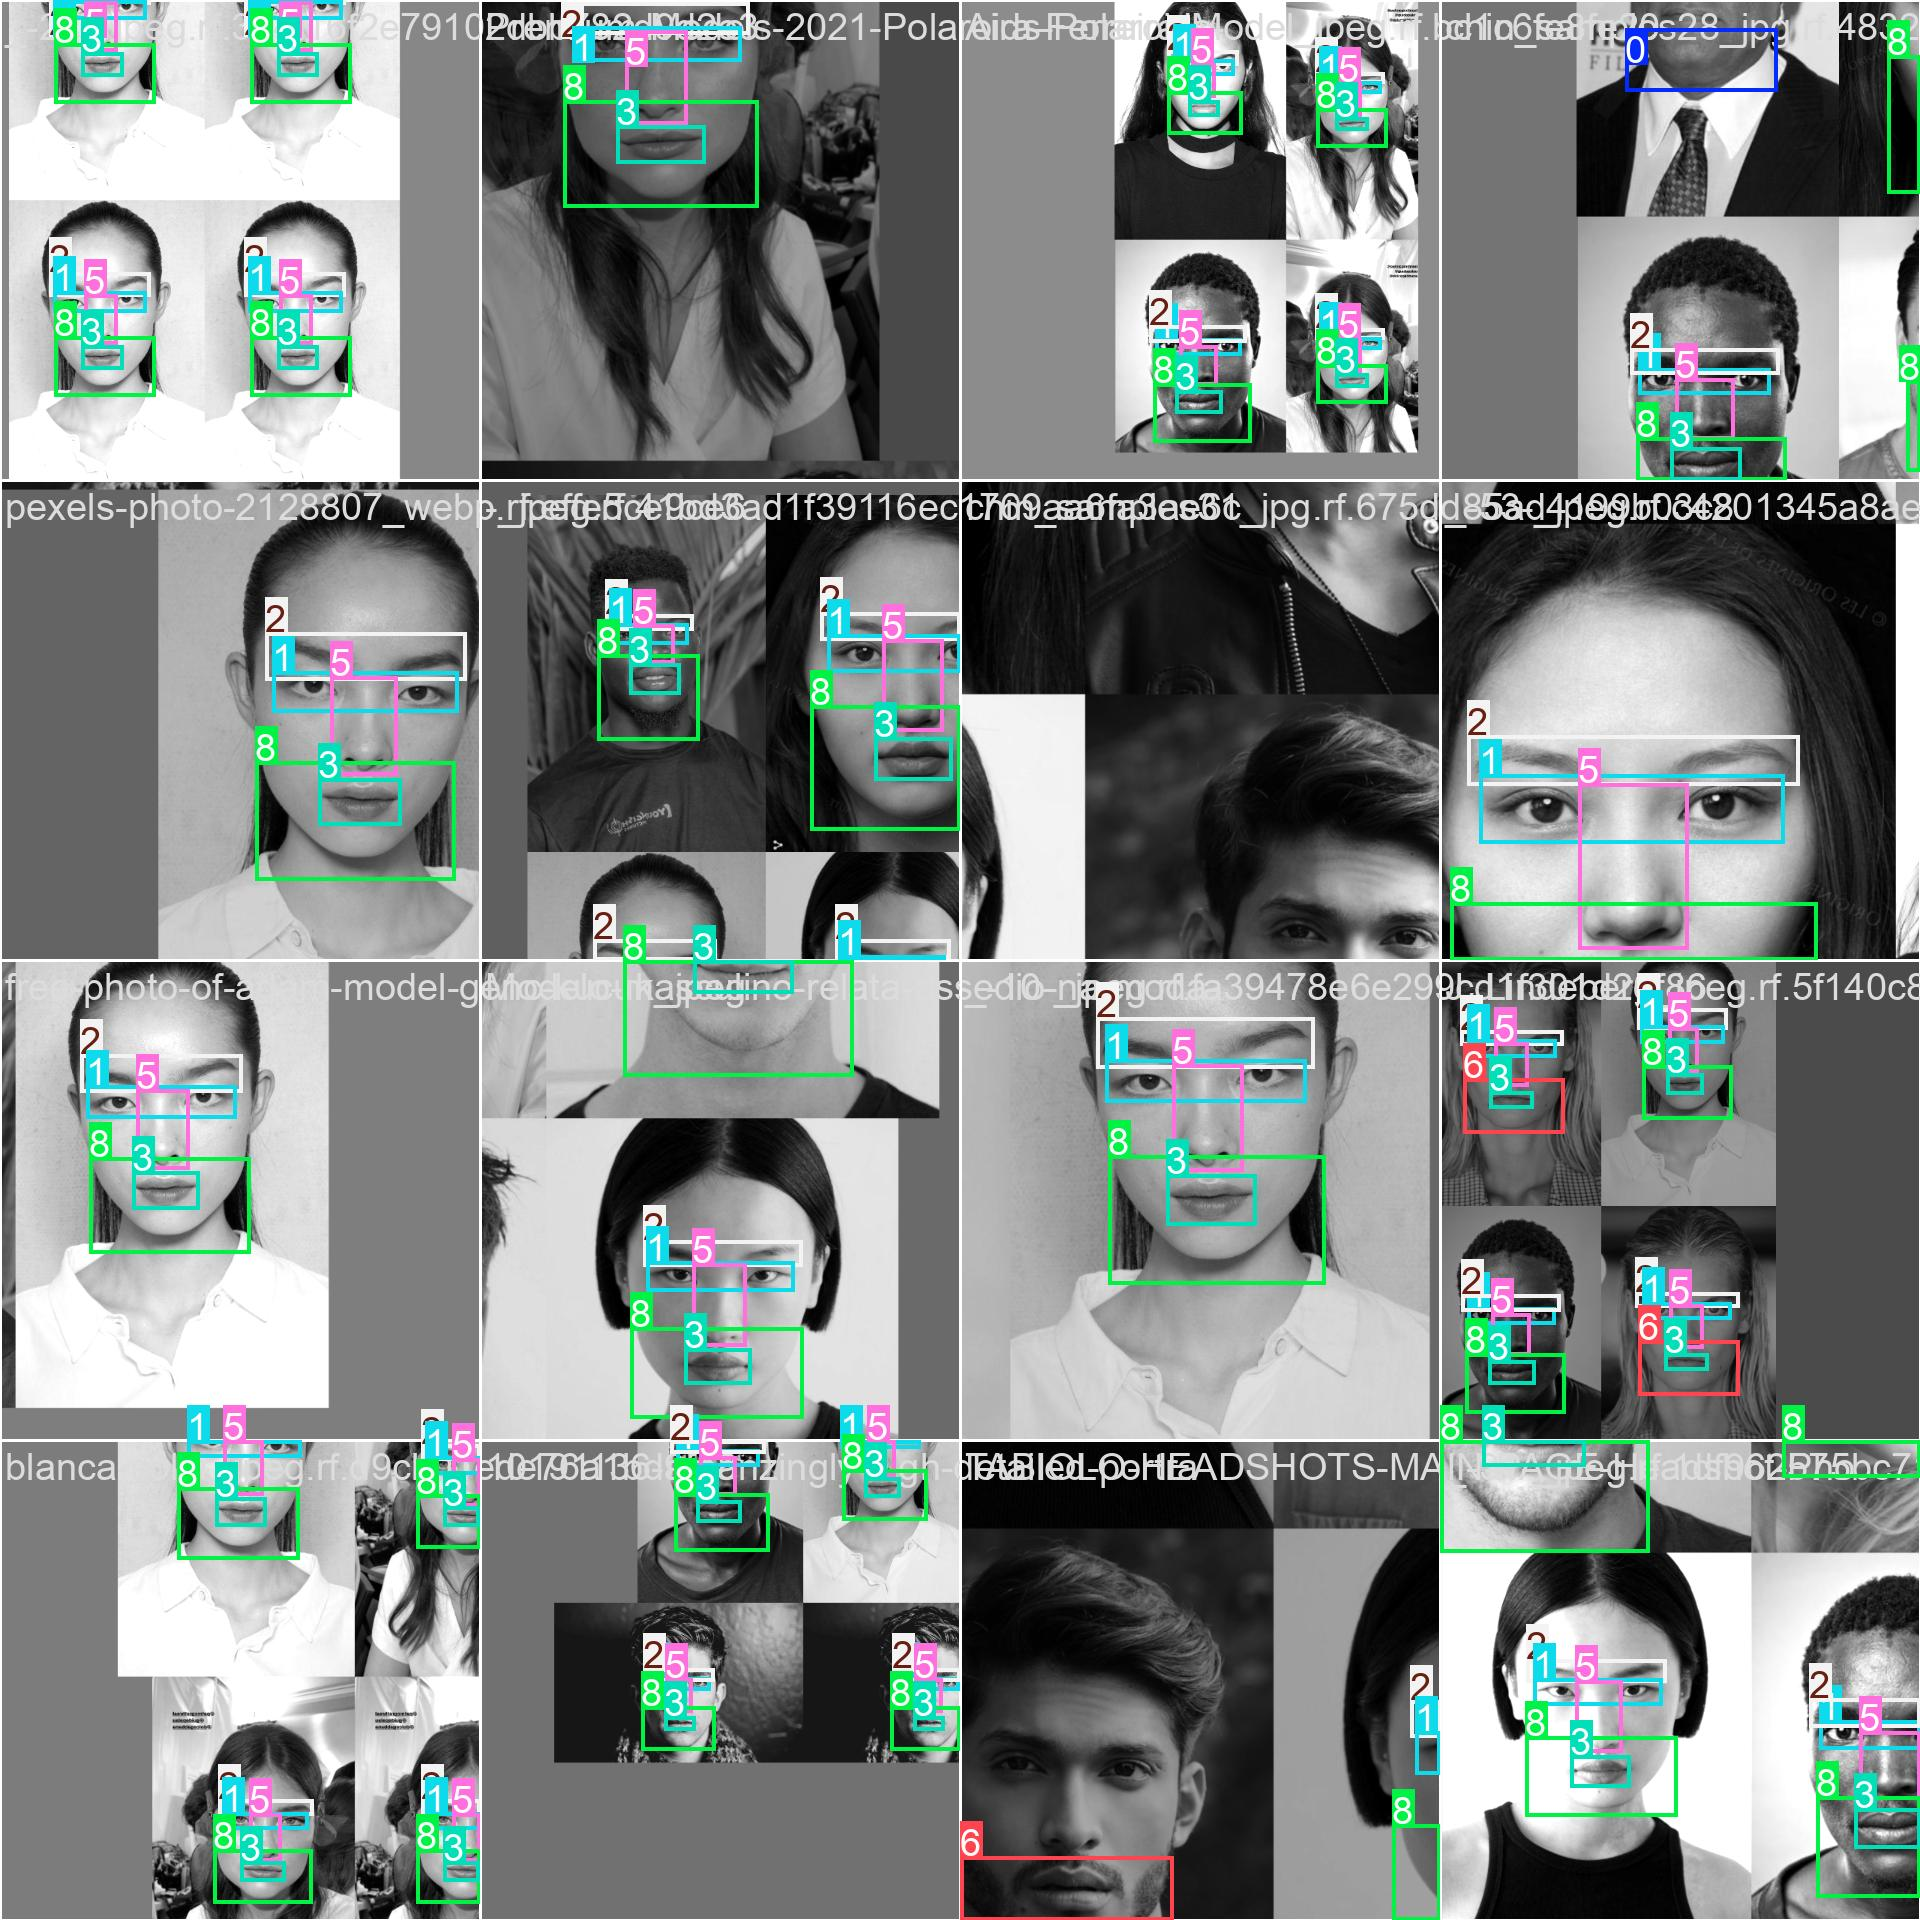

In [ ]:
Image("/content/runs/detect/train4/train_batch0.jpg", width=600)

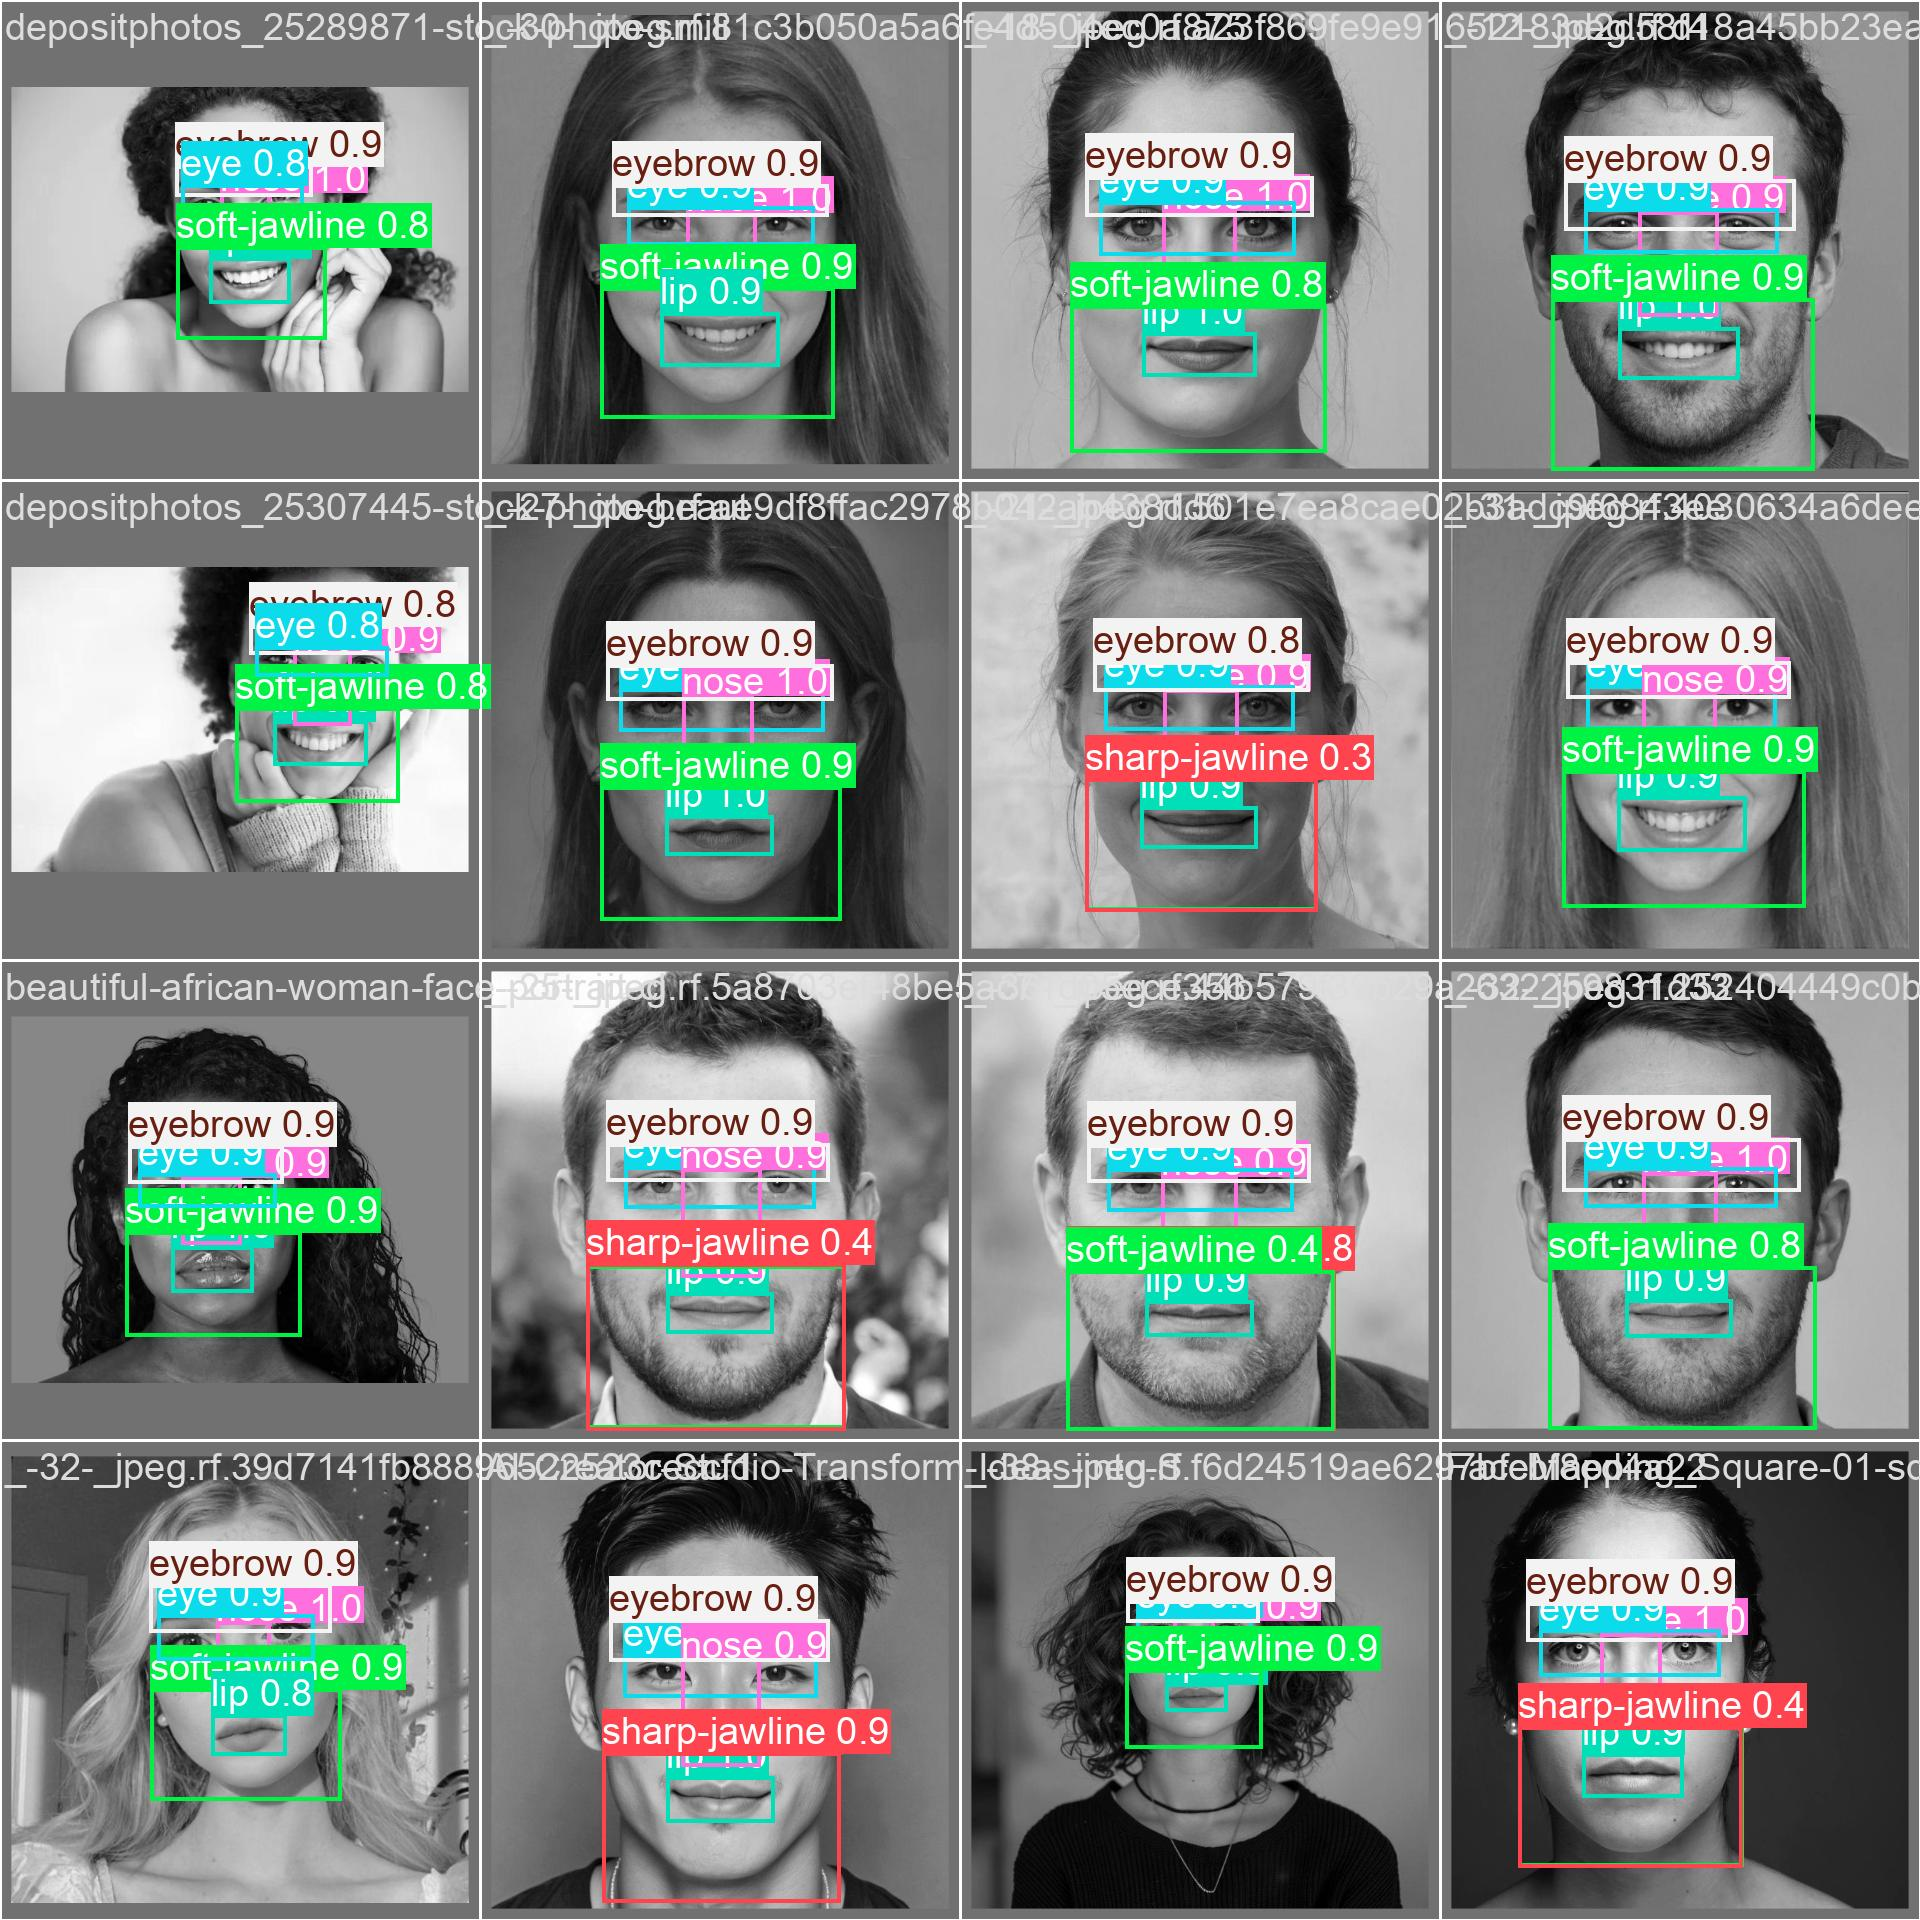

In [ ]:
Image("/content/runs/detect/train4/val_batch0_pred.jpg", width=600)

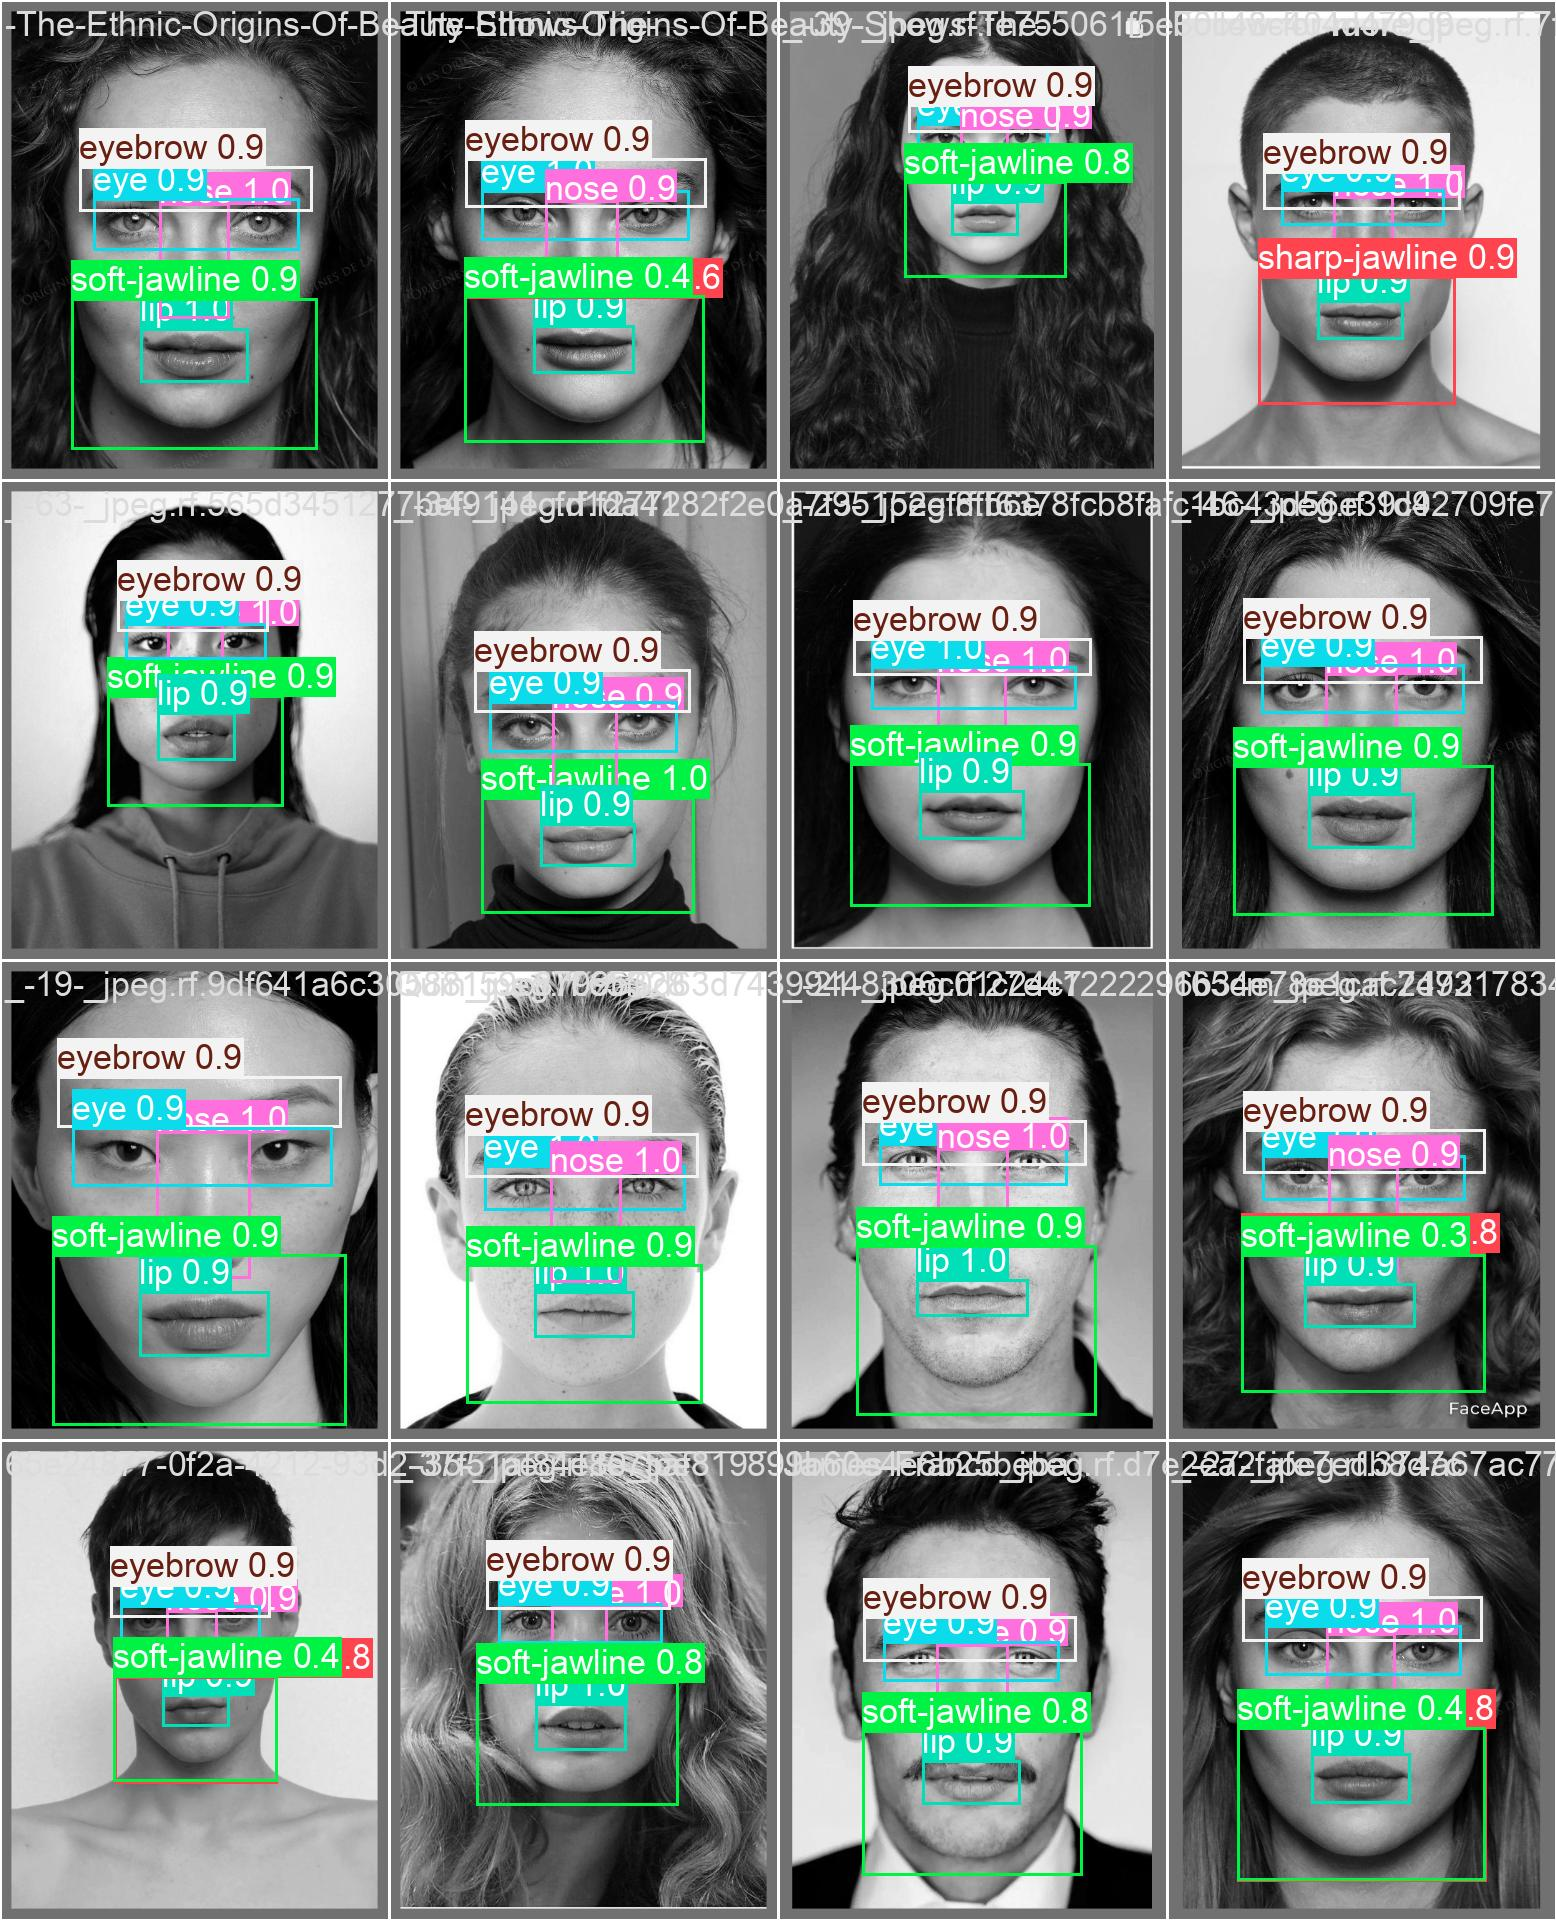

In [ ]:
Image("/content/runs/detect/train4/val_batch1_pred.jpg", width=600)

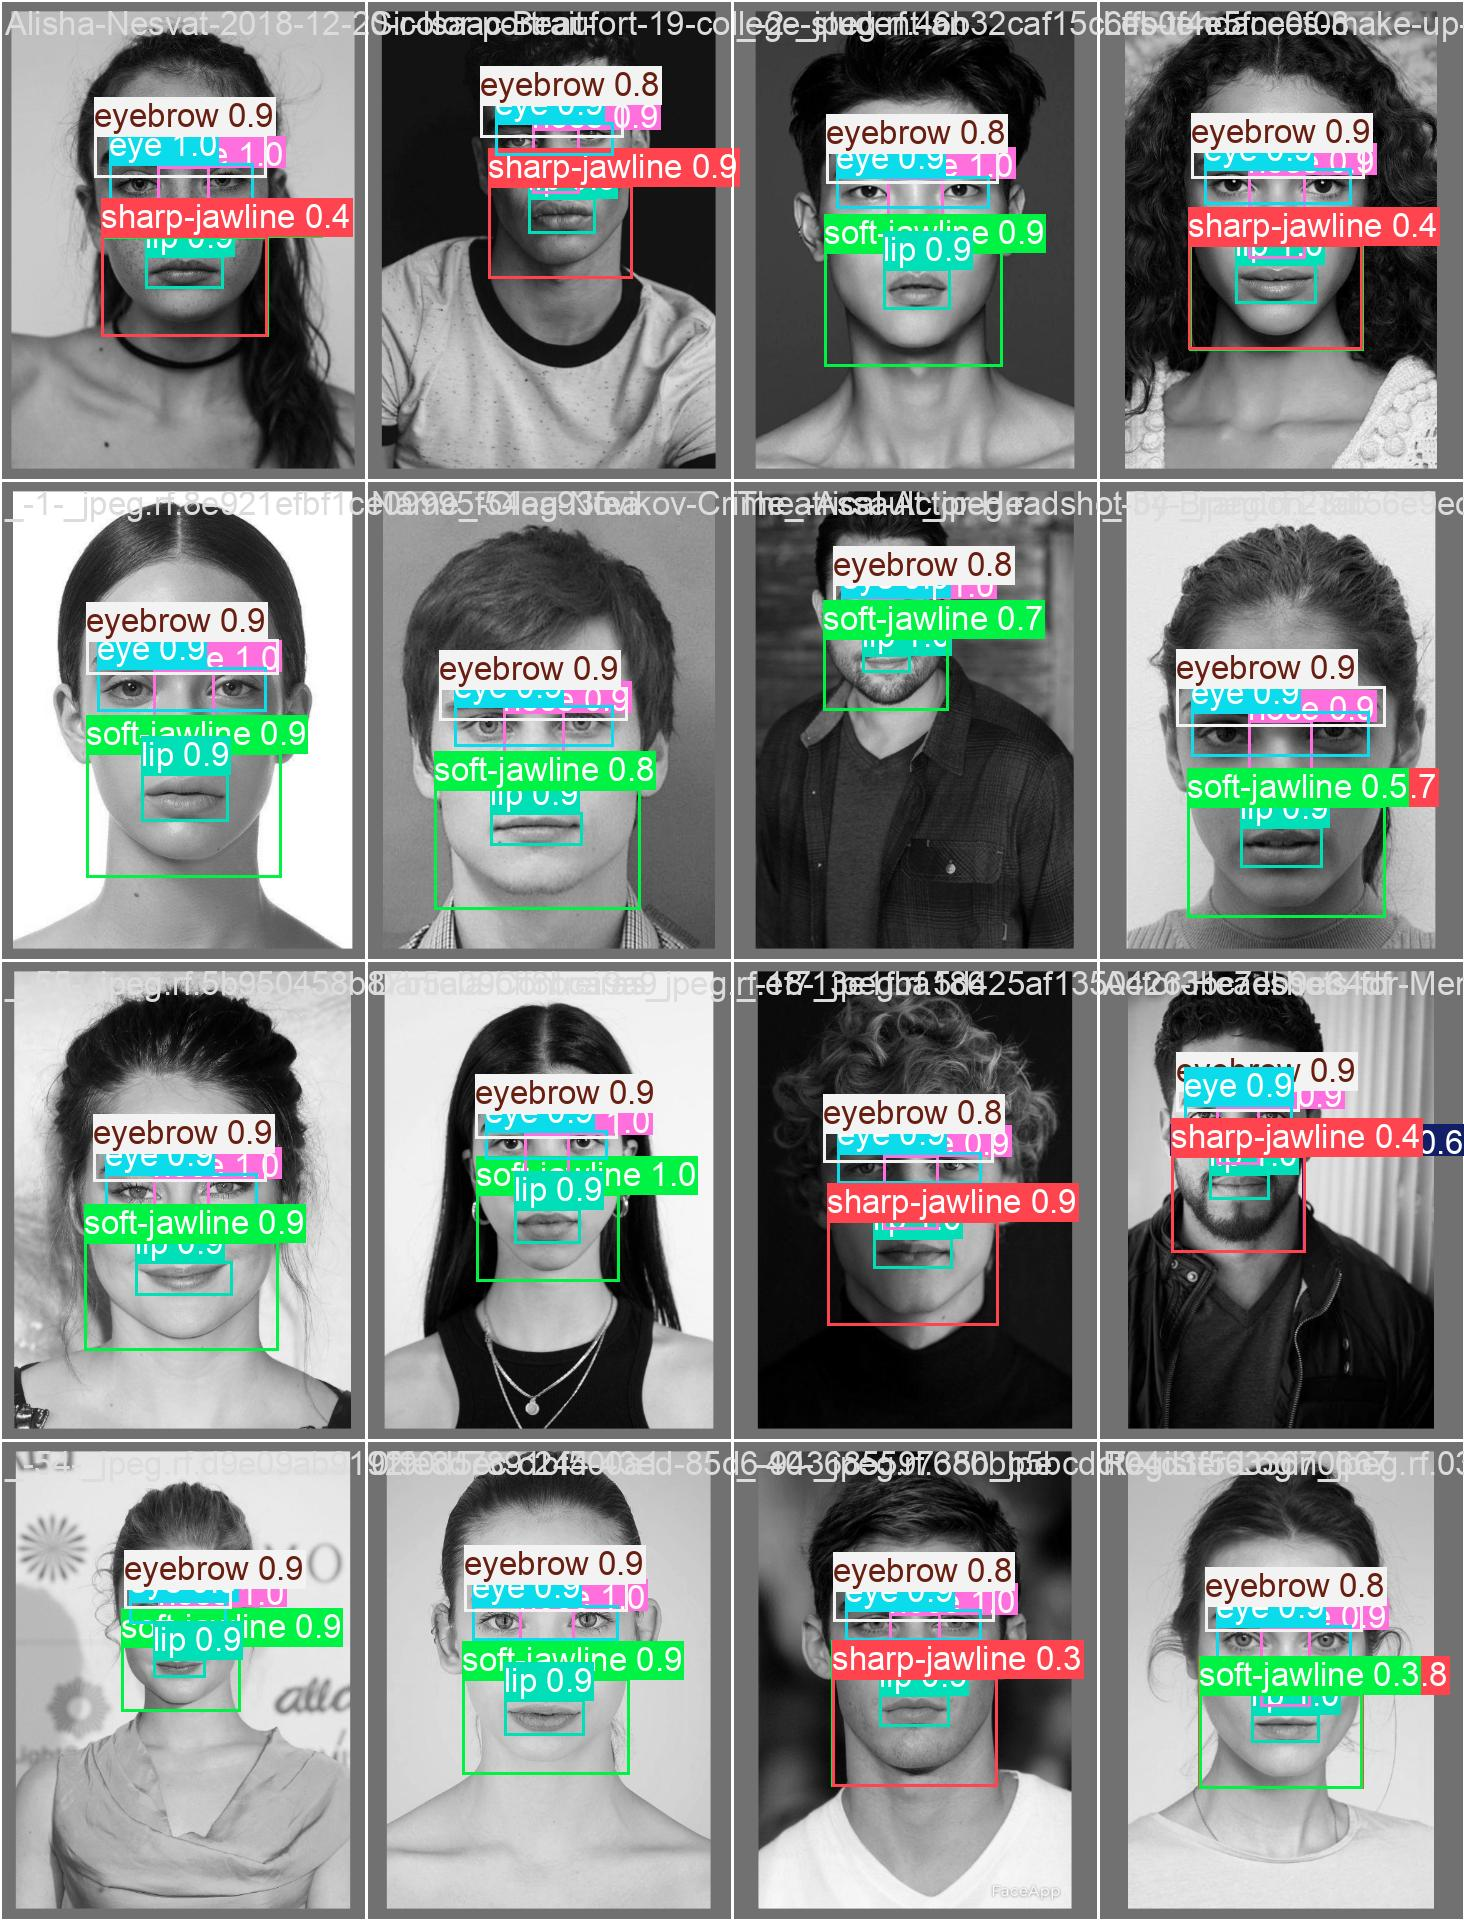

In [ ]:
Image("/content/runs/detect/train4/val_batch2_pred.jpg", width=600)

**Step # 06 Download the Model Weights from the Google Drive**

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train4/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Scanning /content/Extracting-Facial-Features-3/valid/labels.cache... 153 images, 0 backgrounds, 0 corrupt: 100% 153/153 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 10/10 [00:03<00:00,  2.95it/s]
                   all        153        765        0.9      0.789      0.842      0.739
                   eye        153        153          1       0.98      0.995       0.84
               eyebrow        153        153          1      0.981      0.995      0.822
                   lip        153        153          1      0.993      0.995      0.896
        mustache-beard          1          1      0.701          1      0.995      0.895
                  nose        153        153          1          1      0.995      0.892
         sharp-jawline         27

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train4/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 986, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/model.py", line 558, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/engine/predictor.py", line 190, in predict_cli
    for _ in gen:  # sourcery skip: remove-empty-nested-block, noqa
  File "/usr/local/lib/python3.11/dist-packages/tor

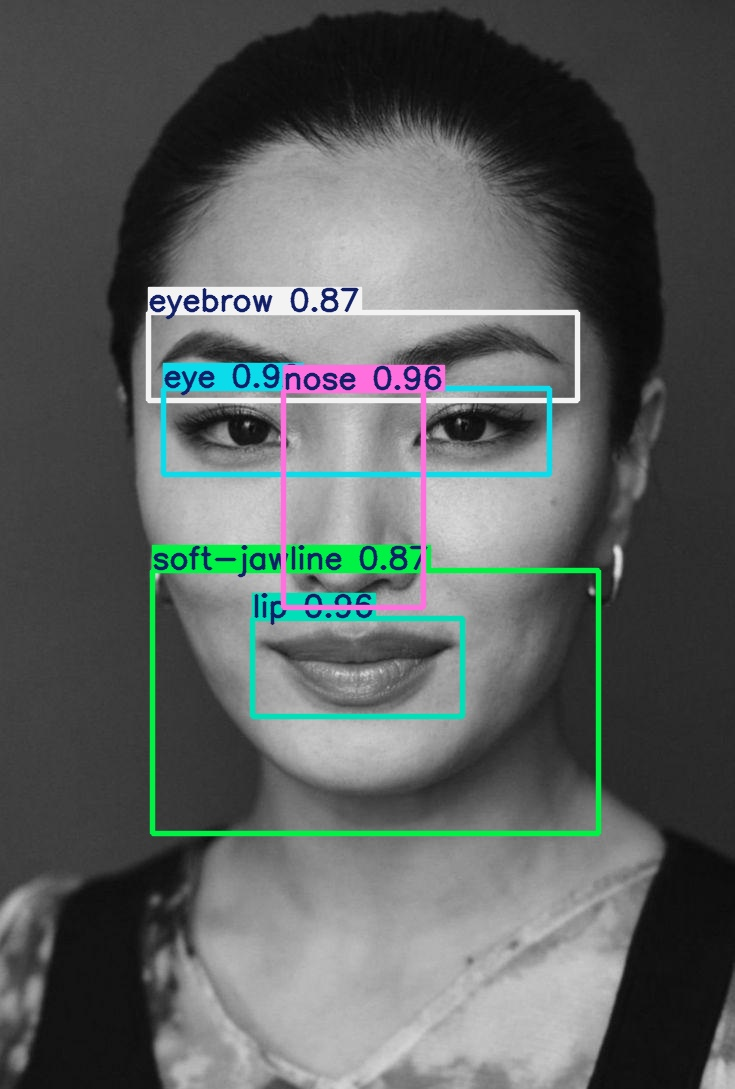

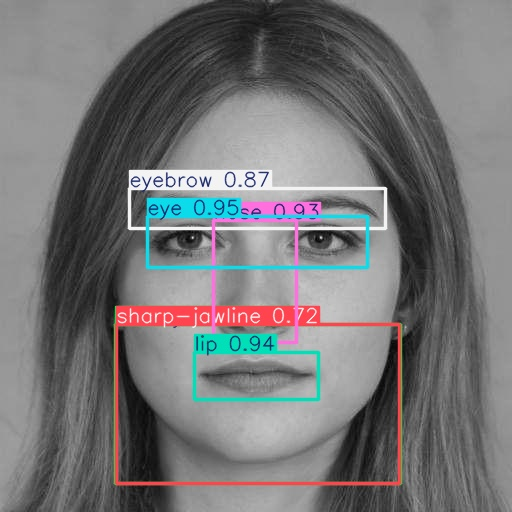

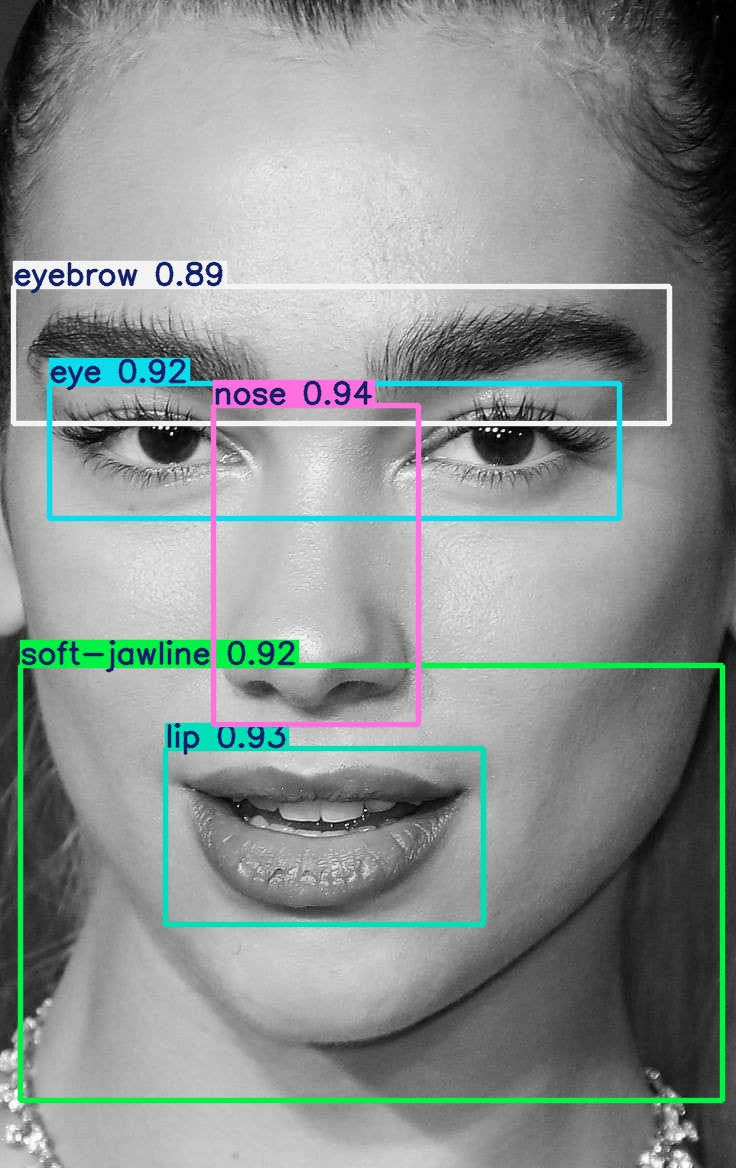

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [ ]:
# delete folder and its content
#import shutil
#shutil.rmtree('/content/runs/detect/predict3')

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train4/weights/best.pt" conf=0.25 source='' save=True

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/runs/detect/predict/68578187-1824-4079-a8a5-9a804cc9e8db_jpeg.rf.6815cb5ab79521a9ff72db02d0b336af.jpg: 640x384 1 mustache-beard, 1 sharp-jawline, 53.1ms
Speed: 3.9ms preprocess, 53.1ms inference, 157.3ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


**Step # 08 Inference with Custom Model on Videos**

In [19]:
!yolo task=detect mode=predict model="/content/runs/detect/train4/weights/best.pt" conf=0.25 source="/content/amazon.mp4" save=True

Ultralytics 8.3.73 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 238 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs

video 1/1 (frame 1/3884) /content/amazon.mp4: 384x640 (no detections), 46.9ms
video 1/1 (frame 2/3884) /content/amazon.mp4: 384x640 (no detections), 8.8ms
video 1/1 (frame 3/3884) /content/amazon.mp4: 384x640 (no detections), 8.2ms
video 1/1 (frame 4/3884) /content/amazon.mp4: 384x640 1 mustache-beard, 8.5ms
video 1/1 (frame 5/3884) /content/amazon.mp4: 384x640 1 mustache-beard, 9.0ms
video 1/1 (frame 6/3884) /content/amazon.mp4: 384x640 1 lip, 1 mustache-beard, 1 nose, 8.6ms
video 1/1 (frame 7/3884) /content/amazon.mp4: 384x640 1 lip, 1 mustache-beard, 1 nose, 9.6ms
video 1/1 (frame 8/3884) /content/amazon.mp4: 384x640 1 lip, 1 mustache-beard, 1 nose, 8.0ms
video 1/1 (frame 9/3884) /content/amazon.mp4: 384x640 1 lip, 1 mustache-beard, 1 nose, 8.2ms
video 1/1 (frame 10/3884) /content/amazon.mp4: 384x640 1 lip, 1 mustache-b

In [ ]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [22]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = '/content/runs/detect/predict4/amazon.avi'

# Compressed video path
compressed_path = "/content/result_compressed.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)